In [2]:
import pandas as pd

# 엑셀 파일 읽기
df1 = pd.read_excel('연도별_주택거래.xlsx')

# 현재 열 이름 확인
print("현재 열 이름:")
print(df1.columns)

# 열 이름 변경
df1.rename(columns={'* 통계표명 :': '지역/년도/거래량(단위:동(호))',
                    '연도별_주택거래': '동(호)'}, inplace=True)

# 불필요한 열 삭제
df1.drop(columns=['Unnamed: 2'], inplace=True)

# 필터링할 지역 목록
regions = [
    '전국', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', 
    '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', 
    '(구)제주', '제주'
]

# '지역/년도' 열을 기준으로 정렬하기 전에 지역을 필터링
filtered_df = df1[df1['지역/년도/거래량(단위:동(호))'].isin(regions)]

# 필터링된 데이터프레임에서 열 이름 변경
num_columns = len(filtered_df.columns)  # 현재 열의 개수
new_column_names = ['지역/년도/거래량(단위:동(호))', '동(호)']  # 첫 두 열 이름

# '동(호)', '면적' 순서로 반복 생성
for i in range(2, num_columns):
    if (i - 2) % 2 == 0:
        new_column_names.append('동(호)')
    else:
        new_column_names.append('면적')

# 열 이름을 변경
filtered_df.columns = new_column_names

# '면적' 열 삭제 (단, '면적' 열을 제외한 열을 남김)
filtered_df = filtered_df.loc[:, filtered_df.columns != '면적']

# '지역/년도/거래량(단위:동(호))'와 '동(호)' 열의 위치를 바꾸기
# '지역/년도/거래량(단위:동(호))'을 인덱스로 설정하고, '동(호)'를 열로 이동
filtered_df = filtered_df.set_index('지역/년도/거래량(단위:동(호))').reset_index()
filtered_df = filtered_df[['동(호)', '지역/년도/거래량(단위:동(호))'] 
                          + [col for col in filtered_df.columns if col not in 
                             ['동(호)', '지역/년도/거래량(단위:동(호))']]]

# 데이터프레임을 전치 (행과 열 바꾸기)
transposed_df = filtered_df.set_index('지역/년도/거래량(단위:동(호))').T

# NaN으로 나오는 행 삭제
transposed_df.dropna(how='all', inplace=True)

# 상위 8행 삭제
transposed_df = transposed_df.iloc[8:]

# 마지막 행 삭제
transposed_df = transposed_df.iloc[:-1]

# 연도 열 추가 (2014년부터 2023년까지)
years = [f"{year}년" for year in range(2014, 2024)]
transposed_df.insert(0, '년도', years)
# 연도와 나머지 열의 순서 조정
transposed_df = transposed_df[['년도'] 
                              + [col for col in transposed_df.columns if col != '년도']]

# '년도' 열을 인덱스로 설정
transposed_df.set_index('년도', inplace=True)

# '년도' 열의 이름을 '거래량'으로 변경
transposed_df.index.name = '지역/년도/거래량(단위:동(호))'

# '(구)제주' 열 삭제
if '(구)제주' in transposed_df.columns:
    transposed_df.drop(columns='(구)제주', inplace=True)

# 결과 출력
print("\n변경된 데이터:")
print(transposed_df)

# 변경된 데이터프레임을 엑셀 파일로 저장
output_file = '변경된_주택거래.csv'
transposed_df.to_csv(output_file)
print(f"\n변경된 데이터가 '{output_file}'로 저장되었습니다.")

transposed_df

현재 열 이름:
Index(['* 통계표명 :', '연도별_주택거래', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40'],
      dtype='object')

변경된 데이터:
지역/년도/거래량(단위:동(호))         전국        서울        부산        대구        인천  \
지역/년도/거래량(단위:동(호))                                                      
2014년               1447123.0  201991.0  128800.0   87003.0   85291.0   
2015년               1720795.0  280313.0  158998.0   88922.0  106224.

지역/년도/거래량(단위:동(호)),전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
지역/년도/거래량(단위:동(호)),,,,,,,,,,,,,,,,,,
2014년,1447123.0,201991.0,128800.0,87003.0,85291.0,61913.0,43298.0,48128.0,17004.0,319526.0,42416.0,44459.0,67300.0,46497.0,39626.0,78634.0,119263.0,15974.0
2015년,1720795.0,280313.0,158998.0,88922.0,106224.0,57374.0,40477.0,49493.0,37627.0,418790.0,42673.0,43439.0,67654.0,47483.0,49470.0,94760.0,117188.0,19910.0
2016년,1624032.0,285594.0,139617.0,67374.0,107841.0,44858.0,40436.0,33826.0,22996.0,433418.0,56582.0,45707.0,63271.0,46244.0,45339.0,69876.0,100245.0,20808.0
2017년,1759661.0,281181.0,131933.0,78530.0,117491.0,58186.0,43421.0,32204.0,33096.0,504477.0,54792.0,47511.0,69652.0,49900.0,47877.0,76185.0,113816.0,19409.0
2018년,1719231.0,264278.0,104400.0,78610.0,110643.0,60453.0,48520.0,26896.0,30294.0,551129.0,53474.0,54604.0,63121.0,59699.0,54022.0,64437.0,77257.0,17394.0
2019년,1569498.0,210898.0,110988.0,82348.0,121143.0,46011.0,55269.0,32546.0,21667.0,481473.0,50231.0,43465.0,59495.0,47115.0,51051.0,56605.0,85883.0,13310.0
2020년,2021865.0,273895.0,164614.0,116910.0,158372.0,64546.0,55032.0,42546.0,26273.0,590982.0,58990.0,54802.0,84055.0,60439.0,65544.0,78593.0,111858.0,14414.0
2021년,1620781.0,193003.0,100250.0,69673.0,136626.0,44061.0,36700.0,30142.0,13695.0,441499.0,65725.0,62999.0,97283.0,54492.0,51479.0,92810.0,113434.0,16910.0
2022년,933347.0,97102.0,53590.0,28768.0,76035.0,28706.0,26322.0,17070.0,7318.0,229488.0,38834.0,44027.0,57126.0,42209.0,43316.0,60388.0,69480.0,13568.0


In [3]:
import pandas as pd

# 엑셀 파일 읽기
df1 = pd.read_excel('연도별_주택거래.xlsx')

# 현재 열 이름 확인
print("현재 열 이름:")
print(df1.columns)

# 열 이름 변경
df1.rename(columns={'* 통계표명 :': '지역/년도/거래량(단위:동(호))',
                    '연도별_주택거래': '동(호)'}, inplace=True)

# 불필요한 열 삭제
df1.drop(columns=['Unnamed: 2'], inplace=True)

# 필터링할 지역 목록
regions = [
    '전국', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', 
    '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', 
    '(구)제주', '제주'
]

# '지역/년도' 열을 기준으로 정렬하기 전에 지역을 필터링
filtered_df = df1[df1['지역/년도/거래량(단위:동(호))'].isin(regions)]

# 필터링된 데이터프레임에서 열 이름 변경
num_columns = len(filtered_df.columns)  # 현재 열의 개수
new_column_names = ['지역/년도/거래량(단위:동(호))', '동(호)']  # 첫 두 열 이름

# '동(호)', '면적' 순서로 반복 생성
for i in range(2, num_columns):
    if (i - 2) % 2 == 0:
        new_column_names.append('동(호)')
    else:
        new_column_names.append('면적')

# 열 이름을 변경
filtered_df.columns = new_column_names

# '면적' 열 삭제 (단, '면적' 열을 제외한 열을 남김)
filtered_df = filtered_df.loc[:, filtered_df.columns != '면적']

# '지역/년도/거래량(단위:동(호))'와 '동(호)' 열의 위치를 바꾸기
# '지역/년도/거래량(단위:동(호))'을 인덱스로 설정하고, '동(호)'를 열로 이동
filtered_df = filtered_df.set_index('지역/년도/거래량(단위:동(호))').reset_index()
filtered_df = filtered_df[['동(호)', '지역/년도/거래량(단위:동(호))'] 
                          + [col for col in filtered_df.columns if col not in 
                             ['동(호)', '지역/년도/거래량(단위:동(호))']]]

# 데이터프레임을 전치 (행과 열 바꾸기)
transposed_df = filtered_df.set_index('지역/년도/거래량(단위:동(호))').T

# NaN으로 나오는 행 삭제
transposed_df.dropna(how='all', inplace=True)

# 상위 8행 삭제
transposed_df = transposed_df.iloc[8:]

# 마지막 행 삭제
transposed_df = transposed_df.iloc[:-1]

# 연도 열 추가 (2014년부터 2023년까지)
years = list(range(2014, 2024))  # 정수형으로 연도 리스트 생성
transposed_df.insert(0, '년도', years)

# 연도와 나머지 열의 순서 조정
transposed_df = transposed_df[['년도'] 
                              + [col for col in transposed_df.columns if col != '년도']]

# '년도' 열을 인덱스로 설정
transposed_df.set_index('년도', inplace=True)

# '(구)제주' 열 삭제
if '(구)제주' in transposed_df.columns:
    transposed_df.drop(columns='(구)제주', inplace=True)

# 결과 출력
print("\n변경된 데이터:")
print(transposed_df)

# 변경된 데이터프레임을 엑셀 파일로 저장
output_file = '변경된_주택거래.xlsx'
transposed_df.to_excel(output_file)
print(f"\n변경된 데이터가 '{output_file}'로 저장되었습니다.")

transposed_df

현재 열 이름:
Index(['* 통계표명 :', '연도별_주택거래', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40'],
      dtype='object')

변경된 데이터:
지역/년도/거래량(단위:동(호))         전국        서울        부산        대구        인천  \
년도                                                                      
2014                1447123.0  201991.0  128800.0   87003.0   85291.0   
2015                1720795.0  280313.0  158998.0   88922.0  106224.

지역/년도/거래량(단위:동(호)),전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
년도,,,,,,,,,,,,,,,,,,
2014,1447123.0,201991.0,128800.0,87003.0,85291.0,61913.0,43298.0,48128.0,17004.0,319526.0,42416.0,44459.0,67300.0,46497.0,39626.0,78634.0,119263.0,15974.0
2015,1720795.0,280313.0,158998.0,88922.0,106224.0,57374.0,40477.0,49493.0,37627.0,418790.0,42673.0,43439.0,67654.0,47483.0,49470.0,94760.0,117188.0,19910.0
2016,1624032.0,285594.0,139617.0,67374.0,107841.0,44858.0,40436.0,33826.0,22996.0,433418.0,56582.0,45707.0,63271.0,46244.0,45339.0,69876.0,100245.0,20808.0
2017,1759661.0,281181.0,131933.0,78530.0,117491.0,58186.0,43421.0,32204.0,33096.0,504477.0,54792.0,47511.0,69652.0,49900.0,47877.0,76185.0,113816.0,19409.0
2018,1719231.0,264278.0,104400.0,78610.0,110643.0,60453.0,48520.0,26896.0,30294.0,551129.0,53474.0,54604.0,63121.0,59699.0,54022.0,64437.0,77257.0,17394.0
2019,1569498.0,210898.0,110988.0,82348.0,121143.0,46011.0,55269.0,32546.0,21667.0,481473.0,50231.0,43465.0,59495.0,47115.0,51051.0,56605.0,85883.0,13310.0
2020,2021865.0,273895.0,164614.0,116910.0,158372.0,64546.0,55032.0,42546.0,26273.0,590982.0,58990.0,54802.0,84055.0,60439.0,65544.0,78593.0,111858.0,14414.0
2021,1620781.0,193003.0,100250.0,69673.0,136626.0,44061.0,36700.0,30142.0,13695.0,441499.0,65725.0,62999.0,97283.0,54492.0,51479.0,92810.0,113434.0,16910.0
2022,933347.0,97102.0,53590.0,28768.0,76035.0,28706.0,26322.0,17070.0,7318.0,229488.0,38834.0,44027.0,57126.0,42209.0,43316.0,60388.0,69480.0,13568.0


  지역/년도/거래량(단위:동(호))         전국        서울        부산       대구        인천  \
0              2014년  1447123.0  201991.0  128800.0  87003.0   85291.0   
1              2015년  1720795.0  280313.0  158998.0  88922.0  106224.0   
2              2016년  1624032.0  285594.0  139617.0  67374.0  107841.0   
3              2017년  1759661.0  281181.0  131933.0  78530.0  117491.0   
4              2018년  1719231.0  264278.0  104400.0  78610.0  110643.0   

        광주       대전       울산       세종        경기       강원       충북       충남  \
0  61913.0  43298.0  48128.0  17004.0  319526.0  42416.0  44459.0  67300.0   
1  57374.0  40477.0  49493.0  37627.0  418790.0  42673.0  43439.0  67654.0   
2  44858.0  40436.0  33826.0  22996.0  433418.0  56582.0  45707.0  63271.0   
3  58186.0  43421.0  32204.0  33096.0  504477.0  54792.0  47511.0  69652.0   
4  60453.0  48520.0  26896.0  30294.0  551129.0  53474.0  54604.0  63121.0   

        전북       전남       경북        경남       제주  
0  46497.0  39626.0  78634.0  119263

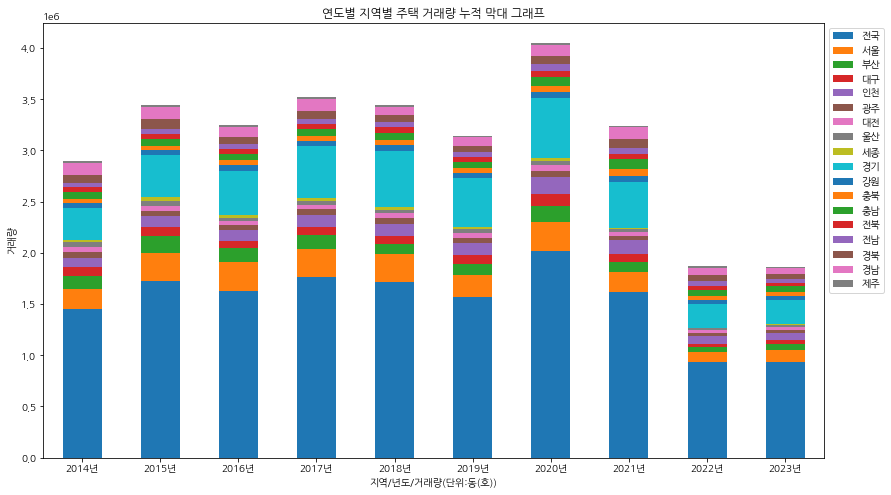

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib.font_manager as fm

# 폰트 설정
font_path='NanumGothic.ttf' 
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name) 

# CSV 파일 읽기
df2 = pd.read_csv('변경된_주택거래.csv')

# 데이터프레임 확인
print(df2.head())

# '년도' 열을 인덱스로 설정
df2.set_index('지역/년도/거래량(단위:동(호))', inplace=True)

# '거래량' 열을 삭제 (해당 열이 그래프에 필요하지 않기 때문에)
if '거래량' in df2.columns:
    df2.drop(columns='거래량', inplace=True)

# 누적 막대 그래프 그리기
df2.plot(kind='bar', stacked=True, figsize=(14, 8))

# 그래프 제목 및 축 레이블 설정
plt.title('연도별 지역별 주택 거래량 누적 막대 그래프')
plt.xlabel('지역/년도/거래량(단위:동(호))')
plt.ylabel('거래량')

# x축 글자 가로로 표시
plt.xticks(rotation=0)

# 범례 위치 설정
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# 그래프 출력
plt.show()


  지역/년도/거래량(단위:동(호))         전국        서울        부산       대구        인천  \
0              2014년  1447123.0  201991.0  128800.0  87003.0   85291.0   
1              2015년  1720795.0  280313.0  158998.0  88922.0  106224.0   
2              2016년  1624032.0  285594.0  139617.0  67374.0  107841.0   
3              2017년  1759661.0  281181.0  131933.0  78530.0  117491.0   
4              2018년  1719231.0  264278.0  104400.0  78610.0  110643.0   

        광주       대전       울산       세종        경기       강원       충북       충남  \
0  61913.0  43298.0  48128.0  17004.0  319526.0  42416.0  44459.0  67300.0   
1  57374.0  40477.0  49493.0  37627.0  418790.0  42673.0  43439.0  67654.0   
2  44858.0  40436.0  33826.0  22996.0  433418.0  56582.0  45707.0  63271.0   
3  58186.0  43421.0  32204.0  33096.0  504477.0  54792.0  47511.0  69652.0   
4  60453.0  48520.0  26896.0  30294.0  551129.0  53474.0  54604.0  63121.0   

        전북       전남       경북        경남       제주  
0  46497.0  39626.0  78634.0  119263

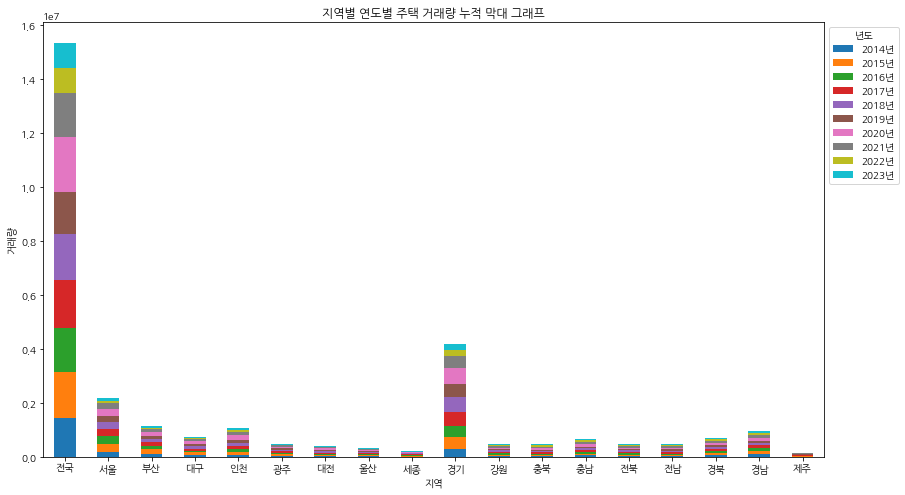

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib.font_manager as fm

# 폰트 설정
font_path='NanumGothic.ttf' 
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name) 

# CSV 파일 읽기
df2 = pd.read_csv('변경된_주택거래.csv')

# 데이터프레임 확인
print(df2.head())

# '년도' 열을 인덱스로 설정
df2.set_index('지역/년도/거래량(단위:동(호))', inplace=True)

# '거래량' 열을 삭제 (해당 열이 그래프에 필요하지 않기 때문에)
if '거래량' in df2.columns:
    df2.drop(columns='거래량', inplace=True)

# 데이터 전치 (Transpose)하여 지역이 x축에 오도록 설정
df2 = df2.T

# 누적 막대 그래프 그리기
df2.plot(kind='bar', stacked=True, figsize=(14, 8))

# 그래프 제목 및 축 레이블 설정
plt.title('지역별 연도별 주택 거래량 누적 막대 그래프')
plt.xlabel('지역')
plt.ylabel('거래량')

# x축 글자 가로로 표시
plt.xticks(rotation=0)

# 범례 위치 설정
plt.legend(title='년도', loc='upper left', bbox_to_anchor=(1, 1))

# 그래프 출력
plt.show()


  지역/년도/거래량(단위:동(호))         전국        서울        부산       대구        인천  \
0              2014년  1447123.0  201991.0  128800.0  87003.0   85291.0   
1              2015년  1720795.0  280313.0  158998.0  88922.0  106224.0   
2              2016년  1624032.0  285594.0  139617.0  67374.0  107841.0   
3              2017년  1759661.0  281181.0  131933.0  78530.0  117491.0   
4              2018년  1719231.0  264278.0  104400.0  78610.0  110643.0   

        광주       대전       울산       세종        경기       강원       충북       충남  \
0  61913.0  43298.0  48128.0  17004.0  319526.0  42416.0  44459.0  67300.0   
1  57374.0  40477.0  49493.0  37627.0  418790.0  42673.0  43439.0  67654.0   
2  44858.0  40436.0  33826.0  22996.0  433418.0  56582.0  45707.0  63271.0   
3  58186.0  43421.0  32204.0  33096.0  504477.0  54792.0  47511.0  69652.0   
4  60453.0  48520.0  26896.0  30294.0  551129.0  53474.0  54604.0  63121.0   

        전북       전남       경북        경남       제주  
0  46497.0  39626.0  78634.0  119263

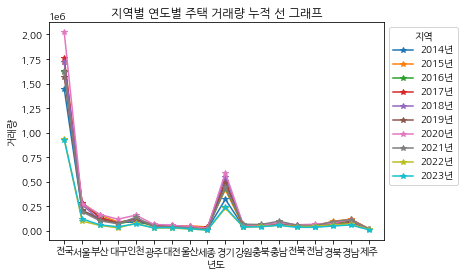

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib.font_manager as fm

# 폰트 설정
font_path='NanumGothic.ttf' 
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name) 

# CSV 파일 읽기
df2 = pd.read_csv('변경된_주택거래.csv')

# 데이터프레임 확인
print(df2.head())

# '년도' 열을 인덱스로 설정
df2.set_index('지역/년도/거래량(단위:동(호))', inplace=True)

# '거래량' 열을 삭제 (해당 열이 그래프에 필요하지 않기 때문에)
if '거래량' in df2.columns:
    df2.drop(columns='거래량', inplace=True)

# 데이터 전치 (Transpose)하여 지역이 x축에 오도록 설정
df2 = df2.T

# 컬러맵 설정
colors = plt.cm.get_cmap('tab10', len(df2.columns))

# 누적 선 그래프 그리기
for idx, region in enumerate(df2.columns):
    plt.plot(df2.index, df2[region], marker='*', color=colors(idx), label=region)

# 그래프 제목 및 축 레이블 설정
plt.title('지역별 연도별 주택 거래량 누적 선 그래프')
plt.xlabel('년도')
plt.ylabel('거래량')

# x축 글자 가로로 표시
plt.xticks(rotation=0)

# 범례 위치 설정
plt.legend(title='지역', loc='upper left', bbox_to_anchor=(1, 1))

# 그래프 출력
plt.show()


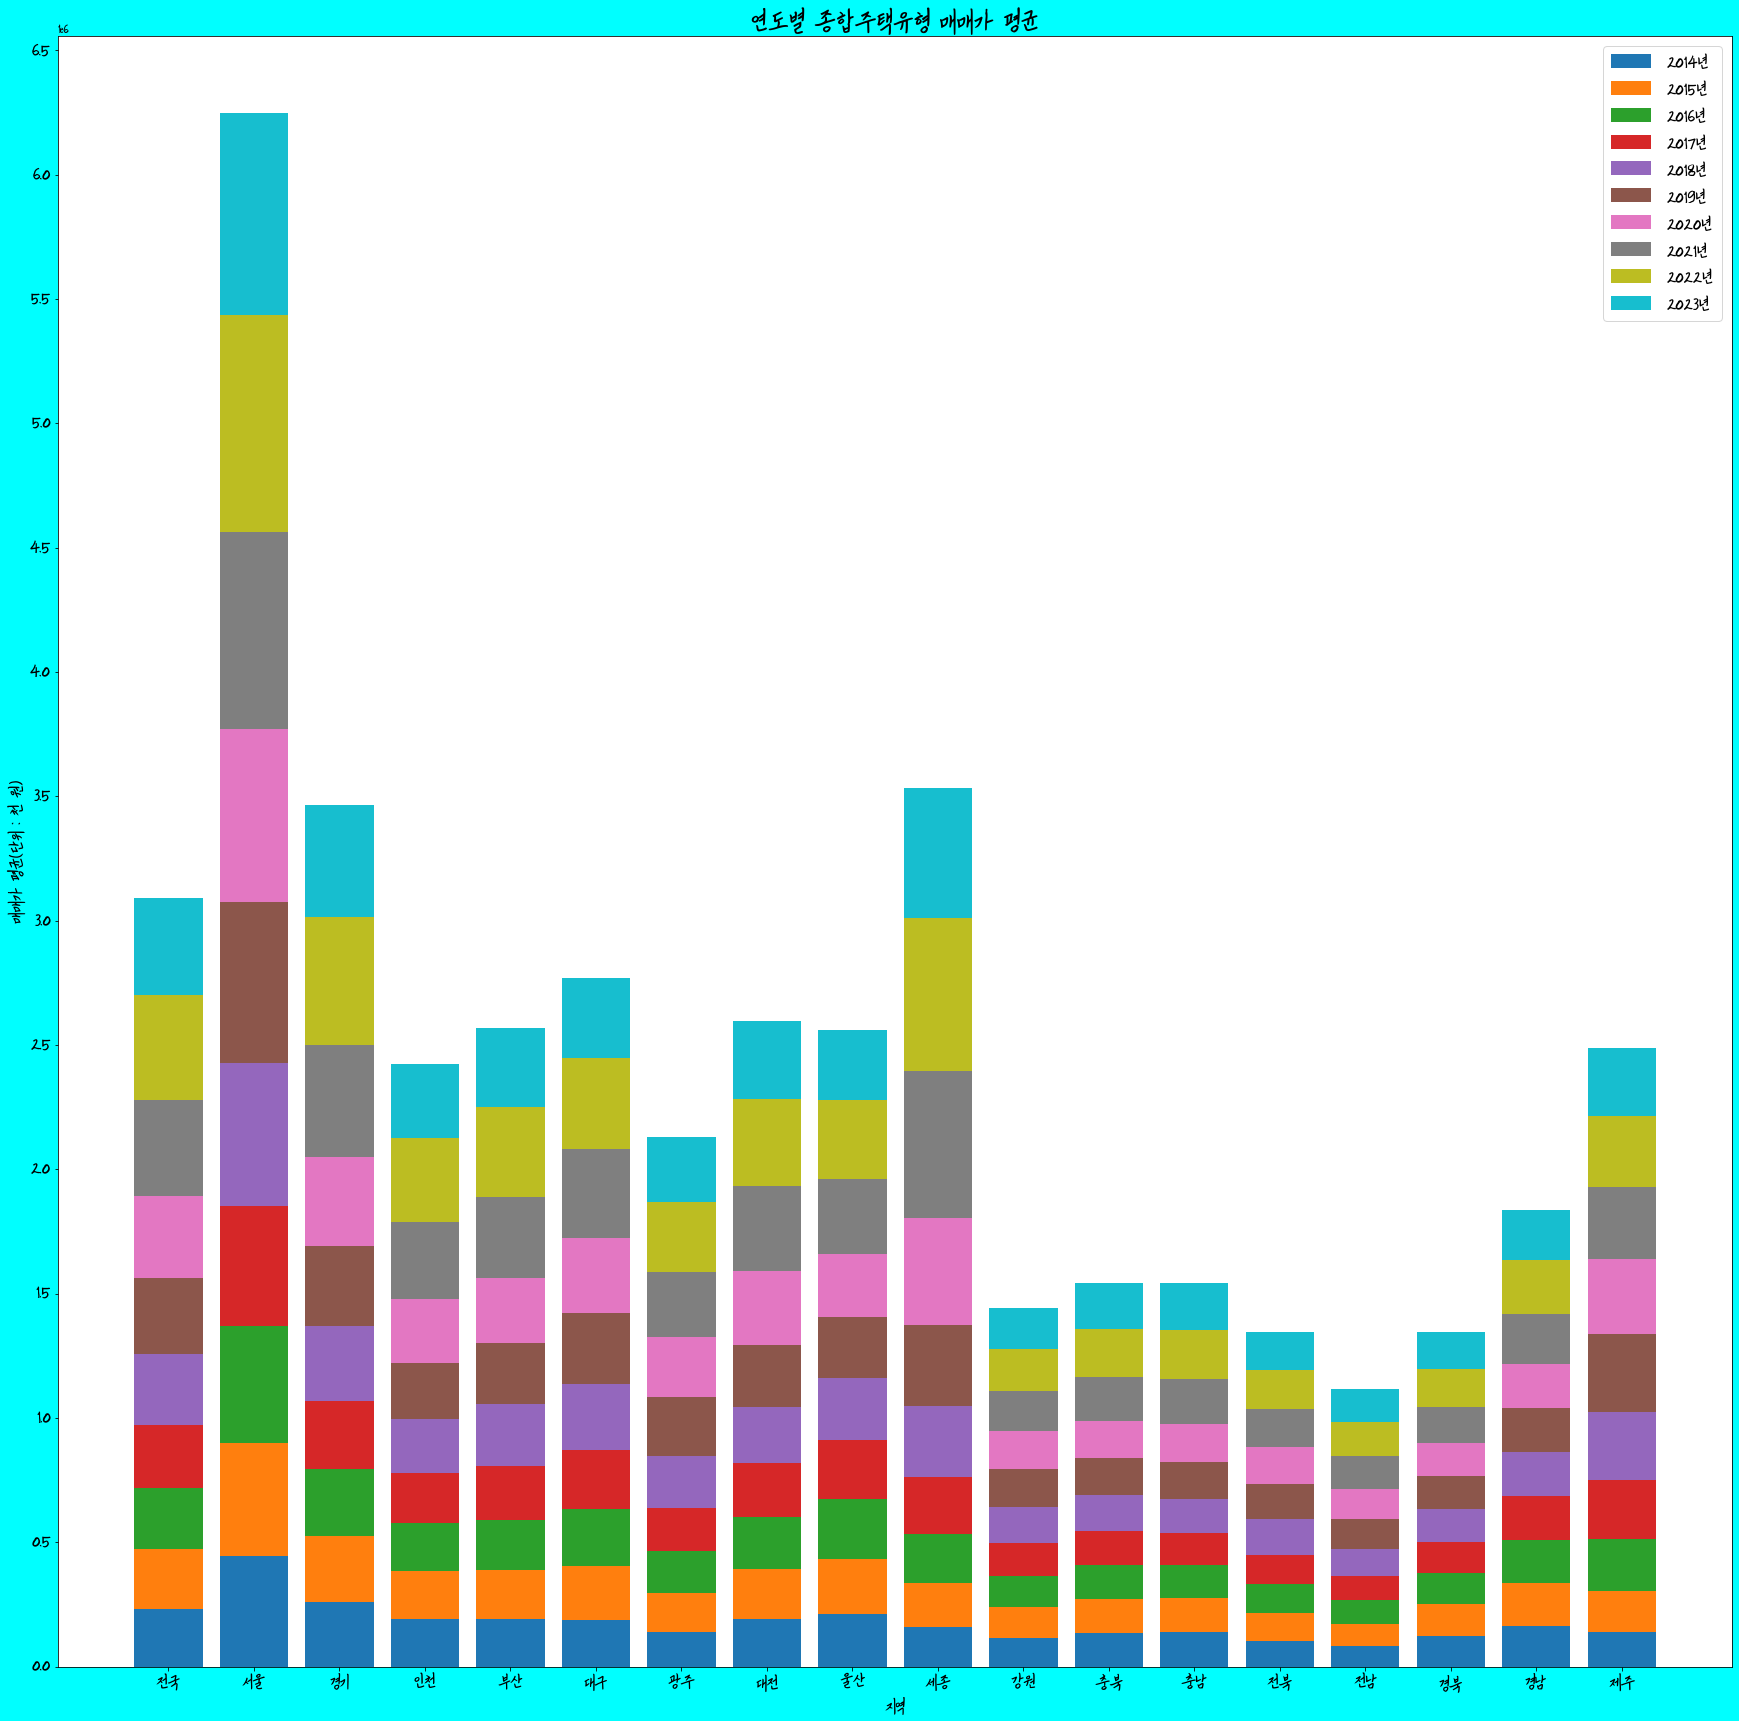

In [31]:
from matplotlib import pyplot as plt
import numpy as np
    
# 한글 Font 설정
plt.rc('font', family = 'Nanum HarABeoJiEuiNaNum', size = '14')
plt.figure(figsize = (30, 30), facecolor = 'cyan')

bottom_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
bottom_array = np.array(bottom_list)

b = 0

for i in range(len(df16.columns)) :
    bar = plt.bar(df16.index, df16[df16.columns[i]], bottom = bottom_array)
    df_list = df16[df16.columns[i]].to_list()
    df_array = np.array(df_list)
    bottom_array += df_array

plt.legend(df16.columns, fontsize = 20)
plt.title('연도별 종합주택유형 매매가 평균', fontsize = 30, fontweight = 'bold')
plt.ylabel('매매가 평균(단위 : 천 원)', fontsize = 20, fontweight = 'bold')
plt.xlabel('지역', fontsize = 20, fontweight = 'bold')
plt.xticks(fontsize = 20)
plt.yticks(np.arange(0, 6500001, 500000), fontsize = 20)
plt.show()


In [32]:
df16.columns
df2.columns

Index(['* 통계표명 :', '평균매매가격_종합', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       ...
       'Unnamed: 143', 'Unnamed: 144', 'Unnamed: 145', 'Unnamed: 146',
       'Unnamed: 147', 'Unnamed: 148', 'Unnamed: 149', 'Unnamed: 150',
       'Unnamed: 151', 'Unnamed: 152'],
      dtype='object', length=153)

Index(['2014년', '2015년', '2016년', '2017년', '2018년', '2019년', '2020년', '2021년',
       '2022년', '2023년'],
      dtype='object', name='연도별 종합주택유형 매매가 평균(단위 : 천원)')


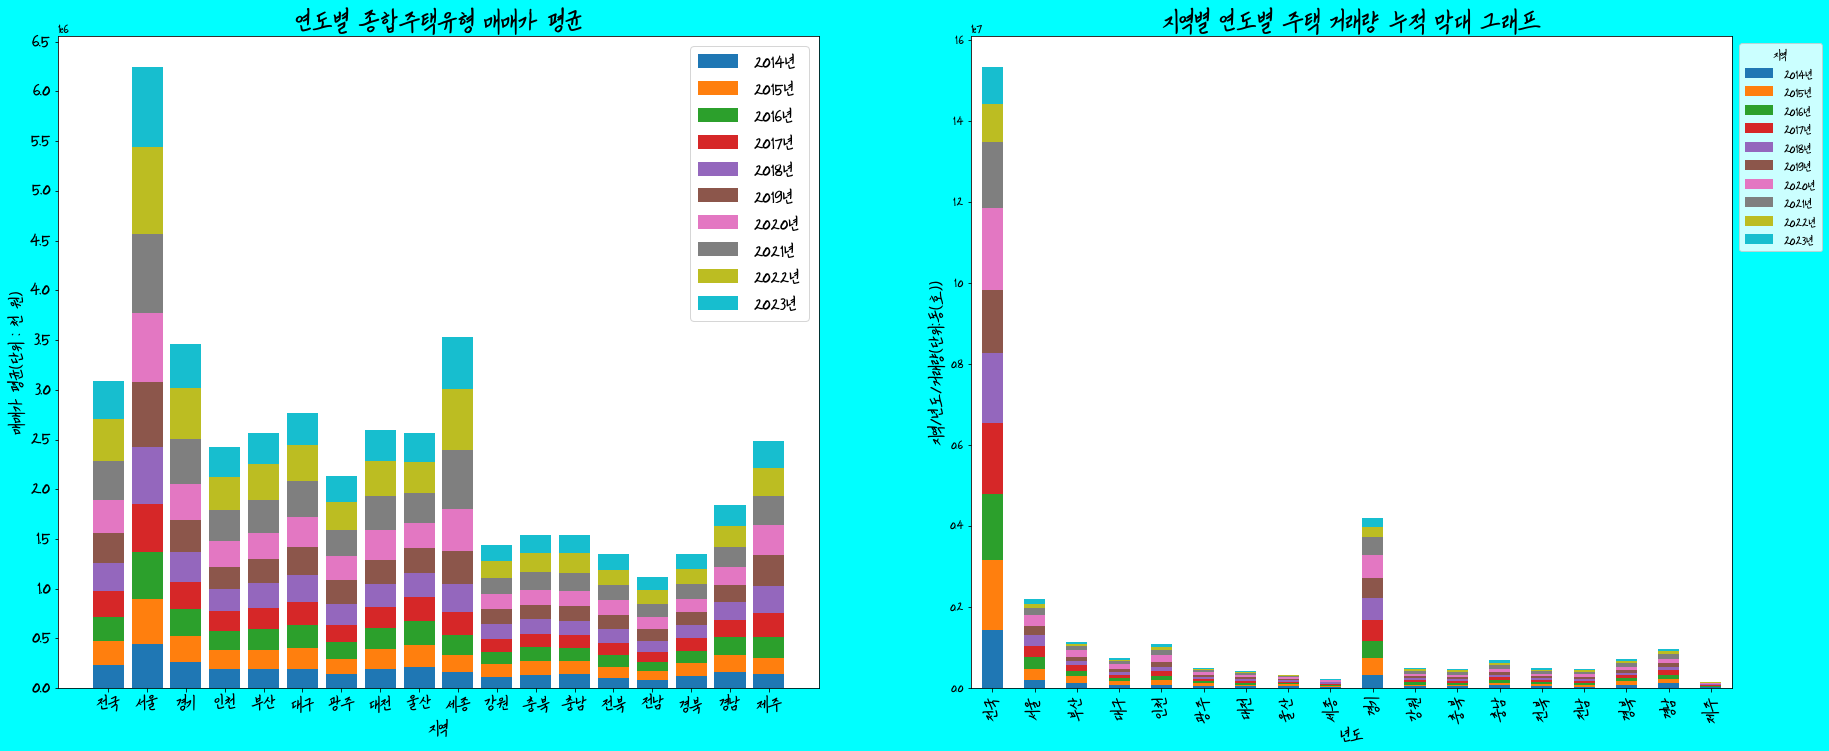

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager, rc

# 폰트 설정
font_path = '/Users/apple/공공데이터/Nanum HarABeoJiEuiNaNum.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name, size=14)

# 첫 번째 데이터프레임 설정 및 그래프
# 열 이름 확인
print(df16.columns)

# '지역' 열이 존재하지 않으면 실제 열 이름으로 수정
# df16.set_index('지역명', inplace=True)  # 실제 열 이름으로 수정

# 한 화면에 두 개의 그래프 배치를 위해 subplot 사용
fig, axes = plt.subplots(1, 2, figsize=(30, 12), facecolor='cyan')

# 첫 번째 그래프: 누적 막대 그래프
bottom_list = [0] * len(df16.index)
bottom_array = np.array(bottom_list)

for i in range(len(df16.columns)):
    axes[0].bar(df16.index, df16[df16.columns[i]], bottom=bottom_array)
    df_list = df16[df16.columns[i]].to_list()
    df_array = np.array(df_list)
    bottom_array += df_array

axes[0].legend(df16.columns, fontsize=20)
axes[0].set_title('연도별 종합주택유형 매매가 평균', fontsize=30, fontweight='bold')
axes[0].set_ylabel('매매가 평균(단위 : 천 원)', fontsize=20, fontweight='bold')
axes[0].set_xlabel('지역', fontsize=20, fontweight='bold')
axes[0].set_xticks(np.arange(len(df16.index)))
axes[0].set_xticklabels(df16.index, fontsize=20)
axes[0].set_yticks(np.arange(0, 6500001, 500000))
axes[0].tick_params(axis='y', labelsize=20)

# 두 번째 그래프: 지역별 연도별 주택 거래량 누적 막대 그래프
# CSV 파일 읽기 (예시 데이터로 대체)
df2 = pd.read_csv('변경된_주택거래.csv')
df2.set_index('지역/년도/거래량(단위:동(호))', inplace=True)
df2 = df2.T

df2.plot(kind='bar', stacked=True, ax=axes[1])

axes[1].set_title('지역별 연도별 주택 거래량 누적 막대 그래프', fontsize=30, fontweight='bold')
axes[1].set_xlabel('년도', fontsize=20, fontweight='bold')
axes[1].set_ylabel('지역/년도/거래량(단위:동(호))', fontsize=20, fontweight='bold')
axes[1].set_xticks(np.arange(len(df2.index)))
axes[1].set_xticklabels(df2.index, fontsize=20)
axes[1].legend(title='지역', loc='upper left', bbox_to_anchor=(1, 1), fontsize=14)

# 그래프 출력
plt.show()


  지역/년도/거래량(단위:동(호))         전국        서울        부산       대구        인천  \
0              2014년  1447123.0  201991.0  128800.0  87003.0   85291.0   
1              2015년  1720795.0  280313.0  158998.0  88922.0  106224.0   
2              2016년  1624032.0  285594.0  139617.0  67374.0  107841.0   
3              2017년  1759661.0  281181.0  131933.0  78530.0  117491.0   
4              2018년  1719231.0  264278.0  104400.0  78610.0  110643.0   

        광주       대전       울산       세종        경기       강원       충북       충남  \
0  61913.0  43298.0  48128.0  17004.0  319526.0  42416.0  44459.0  67300.0   
1  57374.0  40477.0  49493.0  37627.0  418790.0  42673.0  43439.0  67654.0   
2  44858.0  40436.0  33826.0  22996.0  433418.0  56582.0  45707.0  63271.0   
3  58186.0  43421.0  32204.0  33096.0  504477.0  54792.0  47511.0  69652.0   
4  60453.0  48520.0  26896.0  30294.0  551129.0  53474.0  54604.0  63121.0   

        전북       전남       경북        경남       제주  
0  46497.0  39626.0  78634.0  119263

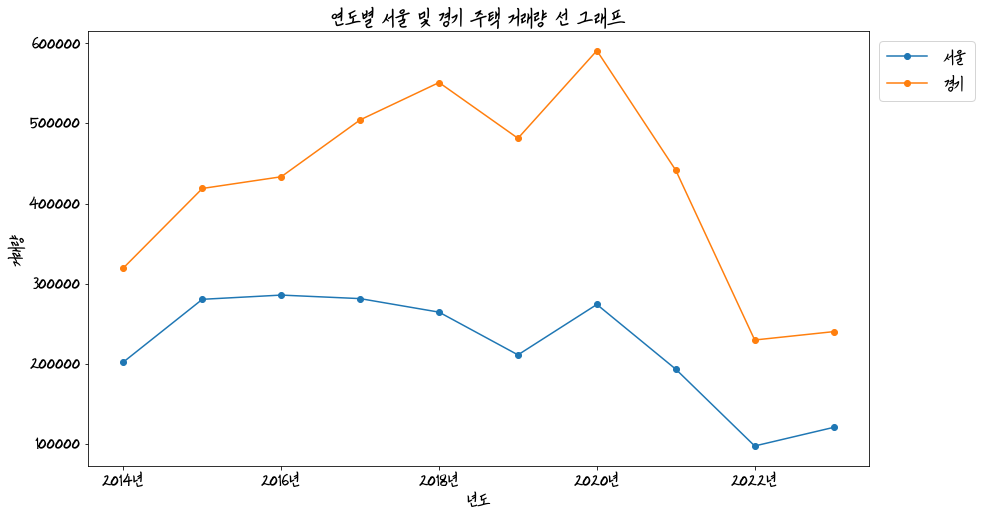

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 폰트 설정
font_path = '/Users/apple/공공데이터/Nanum HarABeoJiEuiNaNum.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name, size=20)

# CSV 파일 읽기
df2 = pd.read_csv('변경된_주택거래.csv')

# 데이터프레임 확인
print(df2.head())

# '서울'과 '경기' 데이터만 필터링
df_filtered = df2[['지역/년도/거래량(단위:동(호))', '서울', '경기']]

# '지역/년도/거래량(단위:동(호))' 열을 인덱스로 설정
df_filtered.set_index('지역/년도/거래량(단위:동(호))', inplace=True)

# 선 그래프 그리기
df_filtered.plot(kind='line', figsize=(14, 8), marker='o')

# 그래프 제목 및 축 레이블 설정
plt.title('연도별 서울 및 경기 주택 거래량 선 그래프')
plt.xlabel('년도')
plt.ylabel('거래량')

# x축 글자 가로로 표시
plt.xticks(rotation=0)

# 범례 위치 설정
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# 그래프 출력
plt.show()


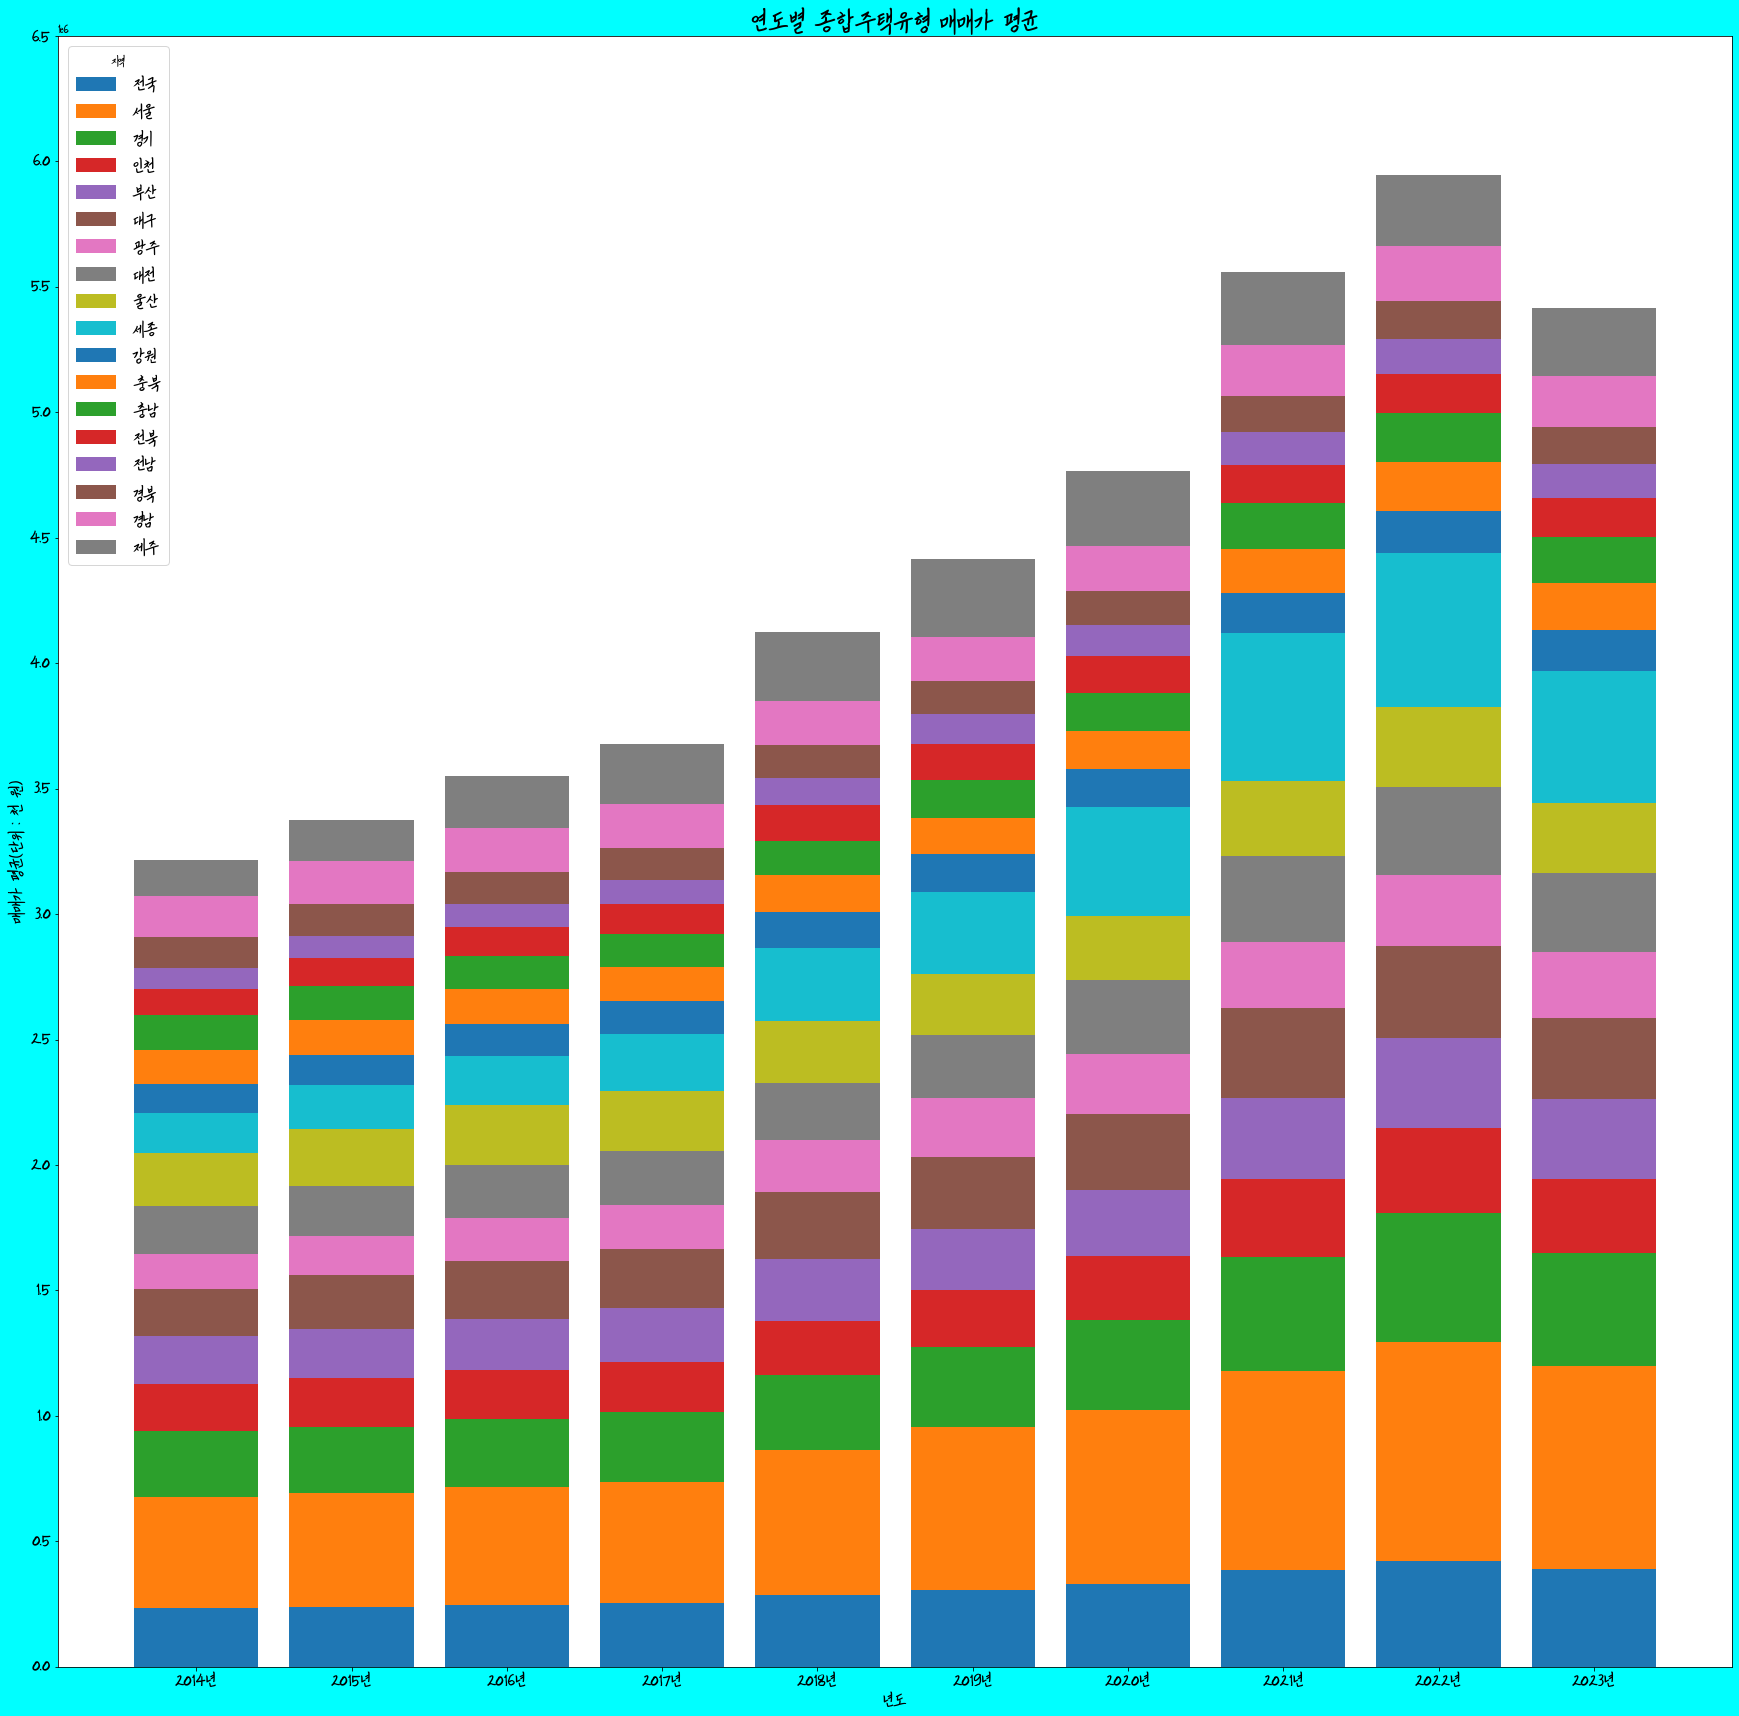

In [35]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# 한글 Font 설정
plt.rc('font', family='Nanum HarABeoJiEuiNaNum', size='14')
plt.figure(figsize=(30, 30), facecolor='cyan')

# x축을 년도로 설정
years = df16.columns

# 초기 설정
bottom_array = np.zeros(len(years))

# 각 지역별로 그래프 그리기
for region in df16.index:
    plt.bar(years, df16.loc[region], bottom=bottom_array, label=region)
    bottom_array += df16.loc[region]

# 범례 및 그래프 설정
plt.legend(fontsize=20, title='지역')
plt.title('연도별 종합주택유형 매매가 평균', fontsize=30, fontweight='bold')
plt.ylabel('매매가 평균(단위 : 천 원)', fontsize=20, fontweight='bold')
plt.xlabel('년도', fontsize=20, fontweight='bold')
plt.xticks(fontsize=20)
plt.yticks(np.arange(0, 6500001, 500000), fontsize=20)

# 그래프 출력
plt.show()


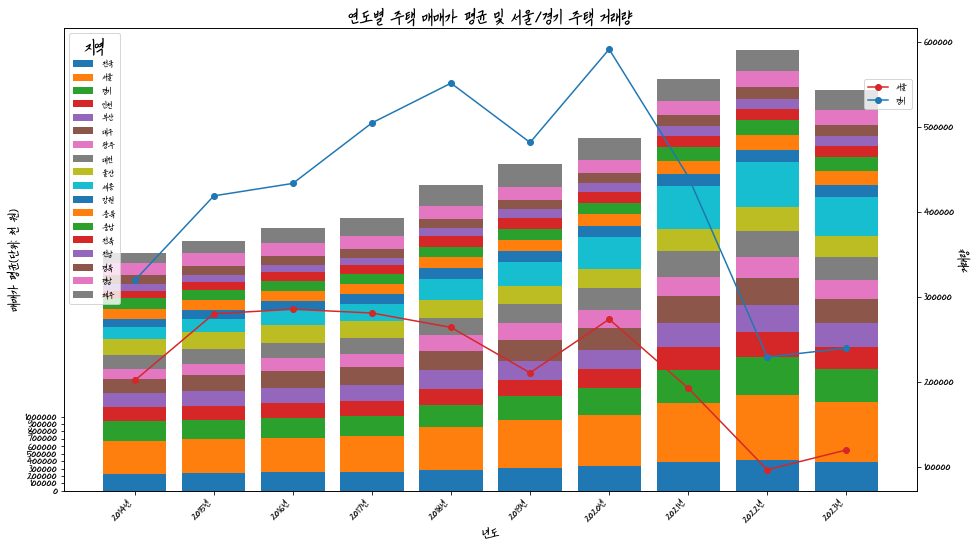

In [36]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import font_manager, rc

# 한글 Font 설정
font_path = '/Users/apple/공공데이터/Nanum HarABeoJiEuiNaNum.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name, size=20)

# CSV 파일 읽기
df2 = pd.read_csv('변경된_주택거래.csv')

# 데이터프레임 설정
years = df16.columns
bottom_array = np.zeros(len(years))

fig, ax1 = plt.subplots(figsize=(14, 8))

# 첫 번째 데이터: 연도별 종합주택유형 매매가 평균 (막대 그래프)
for region in df16.index:
    ax1.bar(years, df16.loc[region], bottom=bottom_array, label=region)
    bottom_array += df16.loc[region]

ax1.set_xlabel('년도', fontsize=15, fontweight='bold')
ax1.set_ylabel('매매가 평균(단위: 천 원)', fontsize=15, fontweight='bold')
ax1.set_title('연도별 주택 매매가 평균 및 서울/경기 주택 거래량', fontsize=20, fontweight='bold')
ax1.legend(loc='upper left', fontsize=10, title='지역')

# 두 번째 데이터: 서울 및 경기 주택 거래량 (선 그래프)
ax2 = ax1.twinx()
ax2.plot(df_filtered.index, df_filtered['서울'], color='tab:red', marker='o', label='서울')
ax2.plot(df_filtered.index, df_filtered['경기'], color='tab:blue', marker='o', label='경기')
ax2.set_ylabel('거래량', fontsize=15, fontweight='bold')
ax2.legend(loc='upper right', fontsize=10, bbox_to_anchor=(1, 0.9))

# x축 레이블 회전 및 기타 설정
ax1.set_xticks(np.arange(len(years)))
ax1.set_xticklabels(years, rotation=45, ha='right', fontsize=12)

# y축 설정
ax1.set_yticks(np.arange(0, 1000001, 100000))
ax1.set_yticklabels(np.arange(0, 1000001, 100000), fontsize=12)
ax2.tick_params(axis='y', labelsize=12)

# 그래프 출력
plt.tight_layout()
plt.show()


In [37]:
import pandas as pd

# 엑셀 파일 읽기
df1 = pd.read_excel('연도별_주택거래.xlsx')

# 현재 열 이름 확인
print("현재 열 이름:")
print(df1.columns)

# 열 이름 변경
df1.rename(columns={'* 통계표명 :': '지역/년도/거래량(단위:동(호))', '연도별_주택거래': '동(호)'}, inplace=True)

# 불필요한 열 삭제
df1.drop(columns=['Unnamed: 2'], inplace=True)

# 필터링할 지역 목록
regions = [
    '전국', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', 
    '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', 
    '(구)제주', '제주'
]

# '지역/년도' 열을 기준으로 정렬하기 전에 지역을 필터링
filtered_df = df1[df1['지역/년도/거래량(단위:동(호))'].isin(regions)]

# 필터링된 데이터프레임에서 열 이름 변경
num_columns = len(filtered_df.columns)  # 현재 열의 개수
new_column_names = ['지역/년도/거래량(단위:동(호))', '동(호)']  # 첫 두 열 이름

# '동(호)', '면적' 순서로 반복 생성
for i in range(2, num_columns):
    if (i - 2) % 2 == 0:
        new_column_names.append('동(호)')
    else:
        new_column_names.append('면적')

# 열 이름을 변경
filtered_df.columns = new_column_names

# '면적' 열 삭제 (단, '면적' 열을 제외한 열을 남김)
filtered_df = filtered_df.loc[:, filtered_df.columns != '면적']

# '지역/년도/거래량(단위:동(호))'와 '동(호)' 열의 위치를 바꾸기
# '지역/년도/거래량(단위:동(호))'을 인덱스로 설정하고, '동(호)'를 열로 이동
filtered_df = filtered_df.set_index('지역/년도/거래량(단위:동(호))').reset_index()
filtered_df = filtered_df[['동(호)', '지역/년도/거래량(단위:동(호))'] + [col for col in filtered_df.columns if col not in ['동(호)', '지역/년도/거래량(단위:동(호))']]]

# 데이터프레임을 전치 (행과 열 바꾸기)
transposed_df = filtered_df.set_index('지역/년도/거래량(단위:동(호))').T

# NaN으로 나오는 행 삭제
transposed_df.dropna(how='all', inplace=True)

# 상위 8행 삭제
transposed_df = transposed_df.iloc[8:]

# 마지막 행 삭제
transposed_df = transposed_df.iloc[:-1]

# 연도 열 추가 (2014년부터 2023년까지)
years = list(range(2014, 2024))  # 정수형으로 연도 리스트 생성
transposed_df.insert(0, '년도', years)

# 연도와 나머지 열의 순서 조정
transposed_df = transposed_df[['년도'] + [col for col in transposed_df.columns if col != '년도']]

# '(구)제주' 열 삭제
if '(구)제주' in transposed_df.columns:
    transposed_df.drop(columns='(구)제주', inplace=True)

# 인덱스 재설정하여 맨 앞열에 번호 추가
transposed_df.reset_index(drop=True, inplace=True)

# 결과 출력
print("\n변경된 데이터:")
print(transposed_df)

# 변경된 데이터프레임을 엑셀 파일로 저장
output_file = '변경된_주택거래_with_index.xlsx'
transposed_df.to_excel(output_file, index=True)
print(f"\n변경된 데이터가 '{output_file}'로 저장되었습니다.")

transposed_df

현재 열 이름:
Index(['* 통계표명 :', '연도별_주택거래', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40'],
      dtype='object')

변경된 데이터:
지역/년도/거래량(단위:동(호))    년도         전국        서울        부산        대구        인천  \
0                   2014  1447123.0  201991.0  128800.0   87003.0   85291.0   
1                   2015  1720795.0  280313.0  158998.0   88922.0  106224.0   
2                   2016  1624032.0  285594.0  139

지역/년도/거래량(단위:동(호)),년도,전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
0,2014,1447123.0,201991.0,128800.0,87003.0,85291.0,61913.0,43298.0,48128.0,17004.0,319526.0,42416.0,44459.0,67300.0,46497.0,39626.0,78634.0,119263.0,15974.0
1,2015,1720795.0,280313.0,158998.0,88922.0,106224.0,57374.0,40477.0,49493.0,37627.0,418790.0,42673.0,43439.0,67654.0,47483.0,49470.0,94760.0,117188.0,19910.0
2,2016,1624032.0,285594.0,139617.0,67374.0,107841.0,44858.0,40436.0,33826.0,22996.0,433418.0,56582.0,45707.0,63271.0,46244.0,45339.0,69876.0,100245.0,20808.0
3,2017,1759661.0,281181.0,131933.0,78530.0,117491.0,58186.0,43421.0,32204.0,33096.0,504477.0,54792.0,47511.0,69652.0,49900.0,47877.0,76185.0,113816.0,19409.0
4,2018,1719231.0,264278.0,104400.0,78610.0,110643.0,60453.0,48520.0,26896.0,30294.0,551129.0,53474.0,54604.0,63121.0,59699.0,54022.0,64437.0,77257.0,17394.0
5,2019,1569498.0,210898.0,110988.0,82348.0,121143.0,46011.0,55269.0,32546.0,21667.0,481473.0,50231.0,43465.0,59495.0,47115.0,51051.0,56605.0,85883.0,13310.0
6,2020,2021865.0,273895.0,164614.0,116910.0,158372.0,64546.0,55032.0,42546.0,26273.0,590982.0,58990.0,54802.0,84055.0,60439.0,65544.0,78593.0,111858.0,14414.0
7,2021,1620781.0,193003.0,100250.0,69673.0,136626.0,44061.0,36700.0,30142.0,13695.0,441499.0,65725.0,62999.0,97283.0,54492.0,51479.0,92810.0,113434.0,16910.0
8,2022,933347.0,97102.0,53590.0,28768.0,76035.0,28706.0,26322.0,17070.0,7318.0,229488.0,38834.0,44027.0,57126.0,42209.0,43316.0,60388.0,69480.0,13568.0
9,2023,928795.0,120328.0,58898.0,40407.0,68866.0,28739.0,31783.0,18879.0,6543.0,239928.0,36775.0,40713.0,53907.0,33873.0,34122.0,47656.0,57624.0,9754.0


In [38]:
import pandas as pd

# 엑셀 파일 읽기
df1 = pd.read_excel('연도별_주택거래.xlsx')

# 현재 열 이름 확인
print("현재 열 이름:")
print(df1.columns)

# 열 이름 변경
df1.rename(columns={'* 통계표명 :': '지역/년도/거래량(단위:동(호))', '연도별_주택거래': '동(호)'}, inplace=True)

# 불필요한 열 삭제
df1.drop(columns=['Unnamed: 2'], inplace=True)

# 필터링할 지역 목록
regions = [
    '전국', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', 
    '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', 
    '(구)제주', '제주'
]

# '지역/년도' 열을 기준으로 정렬하기 전에 지역을 필터링
filtered_df = df1[df1['지역/년도/거래량(단위:동(호))'].isin(regions)]

# 필터링된 데이터프레임에서 열 이름 변경
num_columns = len(filtered_df.columns)  # 현재 열의 개수
new_column_names = ['지역/년도/거래량(단위:동(호))', '동(호)']  # 첫 두 열 이름

# '동(호)', '면적' 순서로 반복 생성
for i in range(2, num_columns):
    if (i - 2) % 2 == 0:
        new_column_names.append('동(호)')
    else:
        new_column_names.append('면적')

# 열 이름을 변경
filtered_df.columns = new_column_names

# '면적' 열 삭제 (단, '면적' 열을 제외한 열을 남김)
filtered_df = filtered_df.loc[:, filtered_df.columns != '면적']

# '지역/년도/거래량(단위:동(호))'와 '동(호)' 열의 위치를 바꾸기
# '지역/년도/거래량(단위:동(호))'을 인덱스로 설정하고, '동(호)'를 열로 이동
filtered_df = filtered_df.set_index('지역/년도/거래량(단위:동(호))').reset_index()
filtered_df = filtered_df[['동(호)', '지역/년도/거래량(단위:동(호))'] + [col for col in filtered_df.columns if col not in ['동(호)', '지역/년도/거래량(단위:동(호))']]]

# 데이터프레임을 전치 (행과 열 바꾸기)
transposed_df = filtered_df.set_index('지역/년도/거래량(단위:동(호))').T

# NaN으로 나오는 행 삭제
transposed_df.dropna(how='all', inplace=True)

# 상위 8행 삭제
transposed_df = transposed_df.iloc[8:]

# 마지막 행 삭제
transposed_df = transposed_df.iloc[:-1]

# 연도 열 추가 (2014년부터 2023년까지)
years = list(range(2014, 2024))  # 정수형으로 연도 리스트 생성
transposed_df.insert(0, '년도', years)

# 연도와 나머지 열의 순서 조정
transposed_df = transposed_df[['년도'] + [col for col in transposed_df.columns if col != '년도']]

# '(구)제주' 열 삭제
if '(구)제주' in transposed_df.columns:
    transposed_df.drop(columns='(구)제주', inplace=True)

# 인덱스 재설정하여 맨 앞열에 번호 추가
transposed_df.reset_index(drop=True, inplace=True)

# 결과 출력
print("\n변경된 데이터:")
print(transposed_df)

# 변경된 데이터프레임을 엑셀 파일로 저장
output_file = '변경된_주택거래_with_index.csv'
transposed_df.to_csv(output_file, index=True)
print(f"\n변경된 데이터가 '{output_file}'로 저장되었습니다.")

transposed_df

현재 열 이름:
Index(['* 통계표명 :', '연도별_주택거래', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40'],
      dtype='object')

변경된 데이터:
지역/년도/거래량(단위:동(호))    년도         전국        서울        부산        대구        인천  \
0                   2014  1447123.0  201991.0  128800.0   87003.0   85291.0   
1                   2015  1720795.0  280313.0  158998.0   88922.0  106224.0   
2                   2016  1624032.0  285594.0  139

지역/년도/거래량(단위:동(호)),년도,전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
0,2014,1447123.0,201991.0,128800.0,87003.0,85291.0,61913.0,43298.0,48128.0,17004.0,319526.0,42416.0,44459.0,67300.0,46497.0,39626.0,78634.0,119263.0,15974.0
1,2015,1720795.0,280313.0,158998.0,88922.0,106224.0,57374.0,40477.0,49493.0,37627.0,418790.0,42673.0,43439.0,67654.0,47483.0,49470.0,94760.0,117188.0,19910.0
2,2016,1624032.0,285594.0,139617.0,67374.0,107841.0,44858.0,40436.0,33826.0,22996.0,433418.0,56582.0,45707.0,63271.0,46244.0,45339.0,69876.0,100245.0,20808.0
3,2017,1759661.0,281181.0,131933.0,78530.0,117491.0,58186.0,43421.0,32204.0,33096.0,504477.0,54792.0,47511.0,69652.0,49900.0,47877.0,76185.0,113816.0,19409.0
4,2018,1719231.0,264278.0,104400.0,78610.0,110643.0,60453.0,48520.0,26896.0,30294.0,551129.0,53474.0,54604.0,63121.0,59699.0,54022.0,64437.0,77257.0,17394.0
5,2019,1569498.0,210898.0,110988.0,82348.0,121143.0,46011.0,55269.0,32546.0,21667.0,481473.0,50231.0,43465.0,59495.0,47115.0,51051.0,56605.0,85883.0,13310.0
6,2020,2021865.0,273895.0,164614.0,116910.0,158372.0,64546.0,55032.0,42546.0,26273.0,590982.0,58990.0,54802.0,84055.0,60439.0,65544.0,78593.0,111858.0,14414.0
7,2021,1620781.0,193003.0,100250.0,69673.0,136626.0,44061.0,36700.0,30142.0,13695.0,441499.0,65725.0,62999.0,97283.0,54492.0,51479.0,92810.0,113434.0,16910.0
8,2022,933347.0,97102.0,53590.0,28768.0,76035.0,28706.0,26322.0,17070.0,7318.0,229488.0,38834.0,44027.0,57126.0,42209.0,43316.0,60388.0,69480.0,13568.0
9,2023,928795.0,120328.0,58898.0,40407.0,68866.0,28739.0,31783.0,18879.0,6543.0,239928.0,36775.0,40713.0,53907.0,33873.0,34122.0,47656.0,57624.0,9754.0


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 폰트 설정
font_path = '/Users/apple/공공데이터/Nanum HarABeoJiEuiNaNum.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name, size=20)

# CSV 파일 읽기
df5 = pd.read_csv('한국은행 기준금리 및 여수신금리_20170239.csv')

# 데이터 확인
print(df5)

# 데이터 프레임 melt (Reshape DataFrame)
df_melted = df5.melt(id_vars=['통계표', '계정항목', '단위', '변환'], 
                     var_name='년도', 
                     value_name='금리')

# 필요한 계정항목 필터링 (e.g., '한국은행 기준금리')
df_filtered = df_melted[df_melted['계정항목'] == '한국은행 기준금리']

# 날짜 형식으로 변환
df_filtered['년도'] = pd.to_datetime(df_filtered['년도'], format='%Y')

# 데이터 확인
print(df_filtered)

# 점 선 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(df_filtered['년도'], df_filtered['금리'], marker='o', linestyle='-', color='b')

# 그래프 제목 및 레이블 설정
plt.title('한국은행 기준 금리 변화')
plt.xlabel('년도')
plt.ylabel('금리 (%)')

# X축 레이블 각도 설정
plt.xticks(rotation=45)

# 그래프 표시
plt.grid(True)
plt.show()


,통계표,계정항목,단위,변환,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1.3.1. 한국은행 기준금리 및 여수신금리,한국은행 기준금리,연%,원자료,2.0,1.5,1.25,1.5,1.75,1.25,0.5,1.0,3.25,3.5


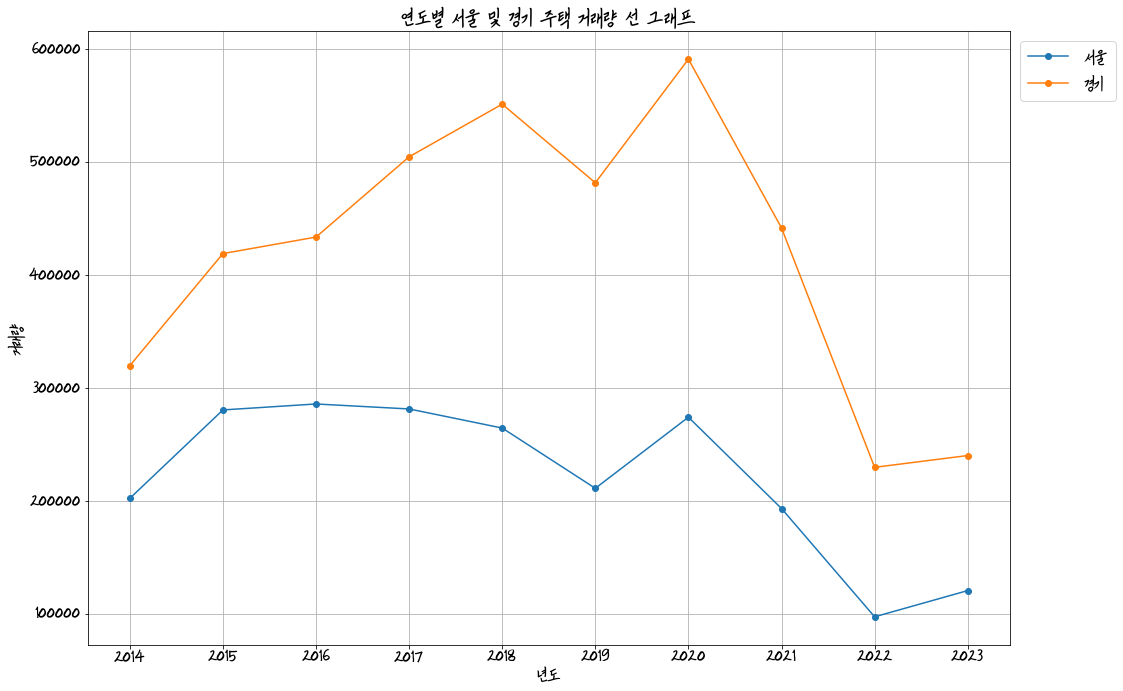

In [63]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 폰트 설정
font_path = '/Users/apple/공공데이터/Nanum HarABeoJiEuiNaNum.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name, size=20)

# CSV 파일 읽기
df2 = pd.read_csv('변경된_주택거래.csv')

# '서울'과 '경기' 데이터만 필터링
df_filtered = df2[['지역/년도/거래량(단위:동(호))', '서울', '경기']].copy()  # .copy()를 사용하여 경고 방지

# '지역/년도/거래량(단위:동(호))' 열에서 연도 추출 및 설정
df_filtered['년도'] = df_filtered['지역/년도/거래량(단위:동(호))'].str.extract('(\d{4})')[0]
df_filtered.set_index('년도', inplace=True)

# 인덱스를 정수형으로 변환
df_filtered.index = df_filtered.index.astype(int)

# 선 그래프 그리기
plt.figure(figsize=(16, 10))  # 그래프 크기 조정

# Plotting the data
plt.plot(df_filtered.index, df_filtered['서울'], marker='o', label='서울')
plt.plot(df_filtered.index, df_filtered['경기'], marker='o', label='경기')

# 그래프 제목 및 축 레이블 설정
plt.title('연도별 서울 및 경기 주택 거래량 선 그래프')
plt.xlabel('년도')
plt.ylabel('거래량')

# x축 레이블 설정
plt.xticks(ticks=df_filtered.index, labels=df_filtered.index, rotation=0)

# 범례 위치 설정
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# 그래프 출력
plt.grid(True)
plt.tight_layout()  # 레이아웃 조정
plt.show()


한국은행 기준금리 데이터:
                        통계표       계정항목  단위   변환  2014  2015  2016  2017  2018  \
0  1.3.1. 한국은행 기준금리 및 여수신금리  한국은행 기준금리  연%  원자료   2.0   1.5  1.25   1.5  1.75   

   2019  2020  2021  2022  2023  
0  1.25   0.5   1.0  3.25   3.5  
주택 거래량 데이터:
  지역/년도/거래량(단위:동(호))         전국        서울        부산       대구        인천  \
0              2014년  1447123.0  201991.0  128800.0  87003.0   85291.0   
1              2015년  1720795.0  280313.0  158998.0  88922.0  106224.0   
2              2016년  1624032.0  285594.0  139617.0  67374.0  107841.0   
3              2017년  1759661.0  281181.0  131933.0  78530.0  117491.0   
4              2018년  1719231.0  264278.0  104400.0  78610.0  110643.0   

        광주       대전       울산       세종        경기       강원       충북       충남  \
0  61913.0  43298.0  48128.0  17004.0  319526.0  42416.0  44459.0  67300.0   
1  57374.0  40477.0  49493.0  37627.0  418790.0  42673.0  43439.0  67654.0   
2  44858.0  40436.0  33826.0  22996.0  433418.0  56582.0  45707

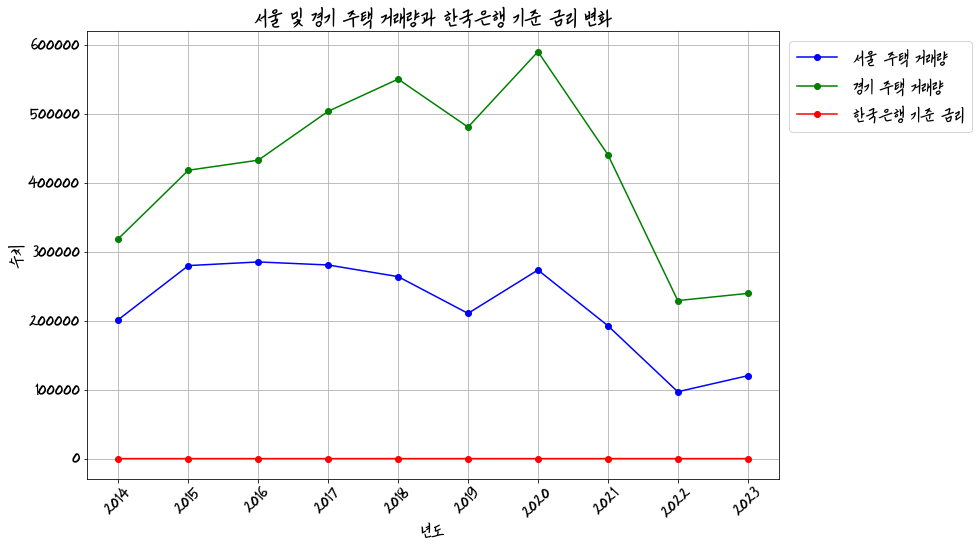

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 폰트 설정
font_path = '/Users/apple/공공데이터/Nanum HarABeoJiEuiNaNum.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name, size=20)

# 1. CSV 파일 읽기
try:
    # 한국은행 기준금리 데이터 읽기
    df5 = pd.read_csv('한국은행 기준금리 및 여수신금리_20170239.csv')
    
    # 주택 거래량 데이터 읽기
    df2 = pd.read_csv('변경된_주택거래.csv')
except FileNotFoundError as e:
    print(f"파일을 찾을 수 없습니다: {e}")
    raise

# 2. 데이터 확인
print("한국은행 기준금리 데이터:")
print(df5.head())

print("주택 거래량 데이터:")
print(df2.head())

# 3. 한국은행 기준금리 데이터 처리
df_melted = df5.melt(id_vars=['통계표', '계정항목', '단위', '변환'], 
                     var_name='년도', 
                     value_name='금리')

df_filtered = df_melted[df_melted['계정항목'] == '한국은행 기준금리'].copy()

# '년도' 열을 문자열로 변환
df_filtered['년도'] = df_filtered['년도'].astype(str)

# 4. 주택 거래량 데이터 처리
df2_filtered = df2[['지역/년도/거래량(단위:동(호))', '서울', '경기']].copy()

# '지역/년도/거래량(단위:동(호))'에서 연도 추출 및 정수로 변환
df2_filtered['년도'] = df2_filtered['지역/년도/거래량(단위:동(호))'].str.extract('(\d{4})')[0]

# '년도' 열을 인덱스로 설정
df2_filtered.set_index('년도', inplace=True)

# '년도'를 인덱스로 설정
df_filtered.set_index('년도', inplace=True)

# 5. 데이터 병합
merged_df = pd.merge(df2_filtered, df_filtered, left_index=True, right_index=True, how='inner')

# 병합된 데이터 확인
print("병합된 데이터:")
print(merged_df.head())

# 6. 그래프 그리기
plt.figure(figsize=(14, 8))

# 서울 주택 거래량
plt.plot(merged_df.index, merged_df['서울'], marker='o', linestyle='-', label='서울 주택 거래량', color='blue')

# 경기 주택 거래량
plt.plot(merged_df.index, merged_df['경기'], marker='o', linestyle='-', label='경기 주택 거래량', color='green')

# 한국은행 기준 금리
plt.plot(merged_df.index, merged_df['금리'], marker='o', linestyle='-', label='한국은행 기준 금리', color='red')

# 그래프 제목 및 레이블 설정
plt.title('서울 및 경기 주택 거래량과 한국은행 기준 금리 변화')
plt.xlabel('년도')
plt.ylabel('수치')

# x축 레이블 각도 설정
plt.xticks(rotation=45)

# 범례 위치 설정
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# 그래프 출력
plt.grid(True)
plt.tight_layout()  # 레이아웃 조정
plt.show()


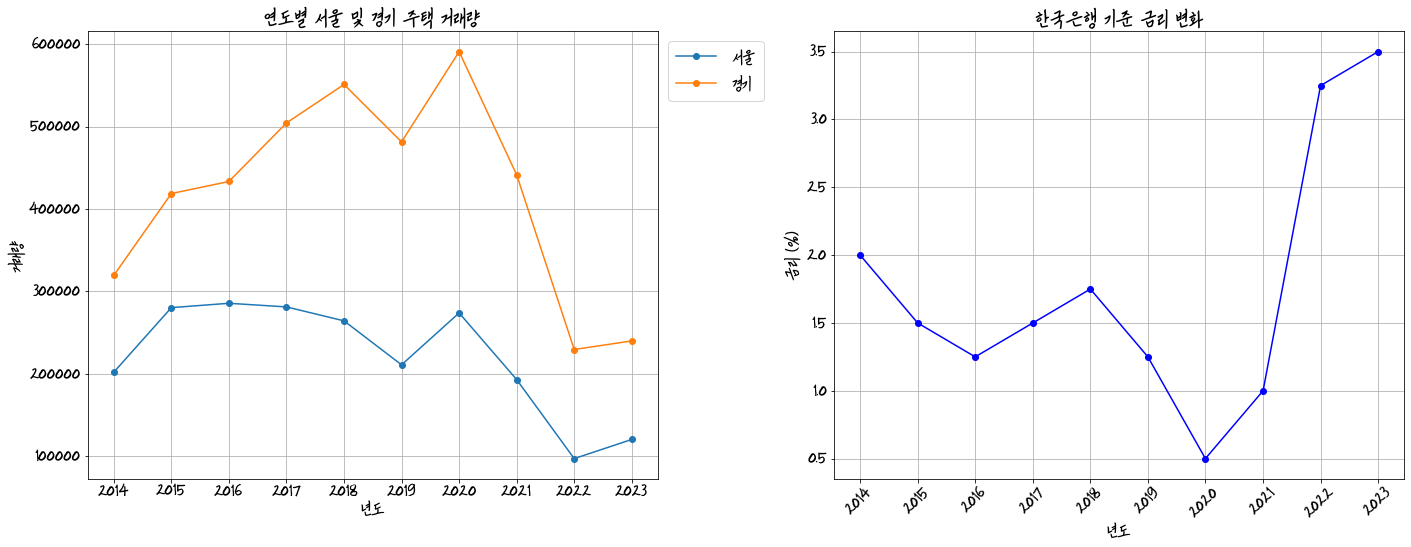

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 폰트 설정
font_path = '/Users/apple/공공데이터/Nanum HarABeoJiEuiNaNum.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name, size=20)

# 데이터 읽기 및 전처리
# 첫 번째 데이터: 서울 및 경기 주택 거래량
df2 = pd.read_csv('변경된_주택거래.csv')
df_filtered = df2[['지역/년도/거래량(단위:동(호))', '서울', '경기']].copy()
df_filtered['년도'] = df_filtered['지역/년도/거래량(단위:동(호))'].str.extract('(\d{4})')[0]
df_filtered.set_index('년도', inplace=True)
df_filtered.index = df_filtered.index.astype(int)

# 두 번째 데이터: 한국은행 기준 금리
df5 = pd.read_csv('한국은행 기준금리 및 여수신금리_20170239.csv')
df_melted = df5.melt(id_vars=['통계표', '계정항목', '단위', '변환'], 
                     var_name='년도', 
                     value_name='금리')
df_filtered_kr = df_melted[df_melted['계정항목'] == '한국은행 기준금리'].copy()
df_filtered_kr['년도'] = pd.to_datetime(df_filtered_kr['년도'], format='%Y')

# 그래프 설정
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# 첫 번째 그래프: 서울 및 경기 주택 거래량
ax1.plot(df_filtered.index, df_filtered['서울'], marker='o', label='서울')
ax1.plot(df_filtered.index, df_filtered['경기'], marker='o', label='경기')
ax1.set_title('연도별 서울 및 경기 주택 거래량')
ax1.set_xlabel('년도')
ax1.set_ylabel('거래량')
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax1.grid(True)
ax1.tick_params(axis='x', rotation=0)

# x축 눈금 설정: 1년 단위로 표시
ax1.set_xticks(df_filtered.index)  # x축 눈금을 연도 리스트로 설정
ax1.set_xticklabels(df_filtered.index, rotation=0)  # 눈금 레이블 설정

# 두 번째 그래프: 한국은행 기준 금리
ax2.plot(df_filtered_kr['년도'], df_filtered_kr['금리'], marker='o', linestyle='-', color='b')
ax2.set_title('한국은행 기준 금리 변화')
ax2.set_xlabel('년도')
ax2.set_ylabel('금리 (%)')
ax2.grid(True)
ax2.tick_params(axis='x', rotation=45)

# 레이아웃 조정
plt.tight_layout()
plt.show()


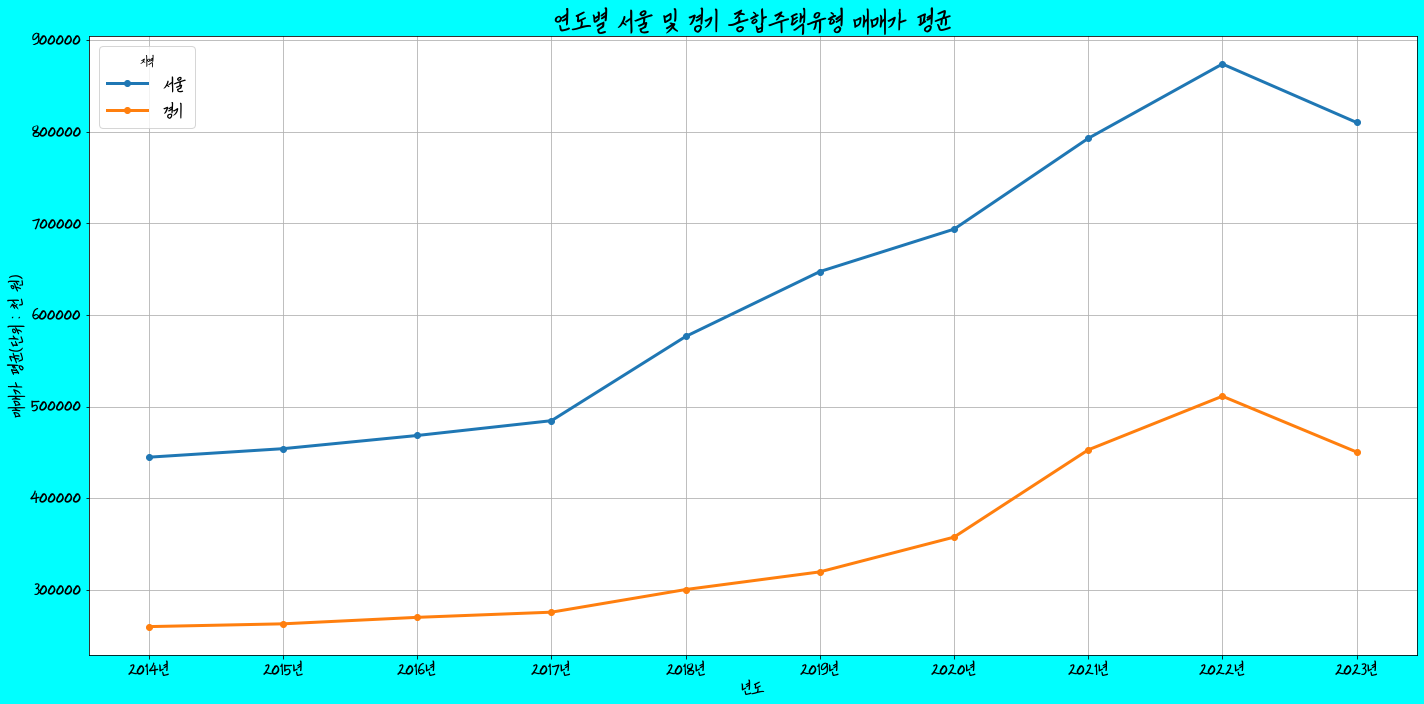

In [43]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# 한글 Font 설정
plt.rc('font', family='Nanum HarABeoJiEuiNaNum', size='14')
plt.figure(figsize=(20, 10), facecolor='cyan')

# x축을 년도로 설정
years = df16.columns

# 서울과 경기 데이터만 추출
seoul_data = df16.loc['서울']
gyeonggi_data = df16.loc['경기']

# 서울과 경기의 선 그래프 그리기
plt.plot(years, seoul_data, marker='o', label='서울', linewidth=3)
plt.plot(years, gyeonggi_data, marker='o', label='경기', linewidth=3)

# 범례 및 그래프 설정
plt.legend(fontsize=20, title='지역')
plt.title('연도별 서울 및 경기 종합주택유형 매매가 평균', fontsize=30, fontweight='bold')
plt.ylabel('매매가 평균(단위 : 천 원)', fontsize=20, fontweight='bold')
plt.xlabel('년도', fontsize=20, fontweight='bold')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)  # yticks에서 arange를 제거

# 그래프 출력
plt.grid(True)  # 그리드 추가
plt.tight_layout()  # 레이아웃 조정
plt.show()


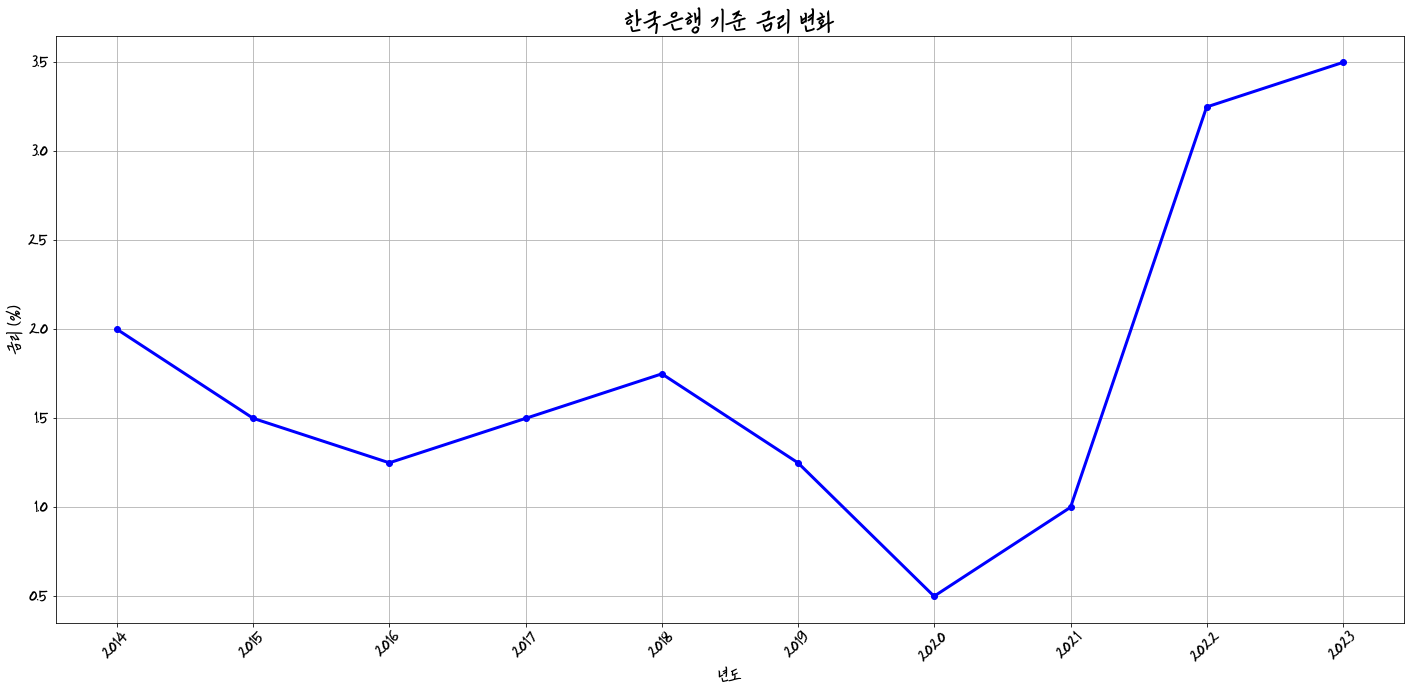

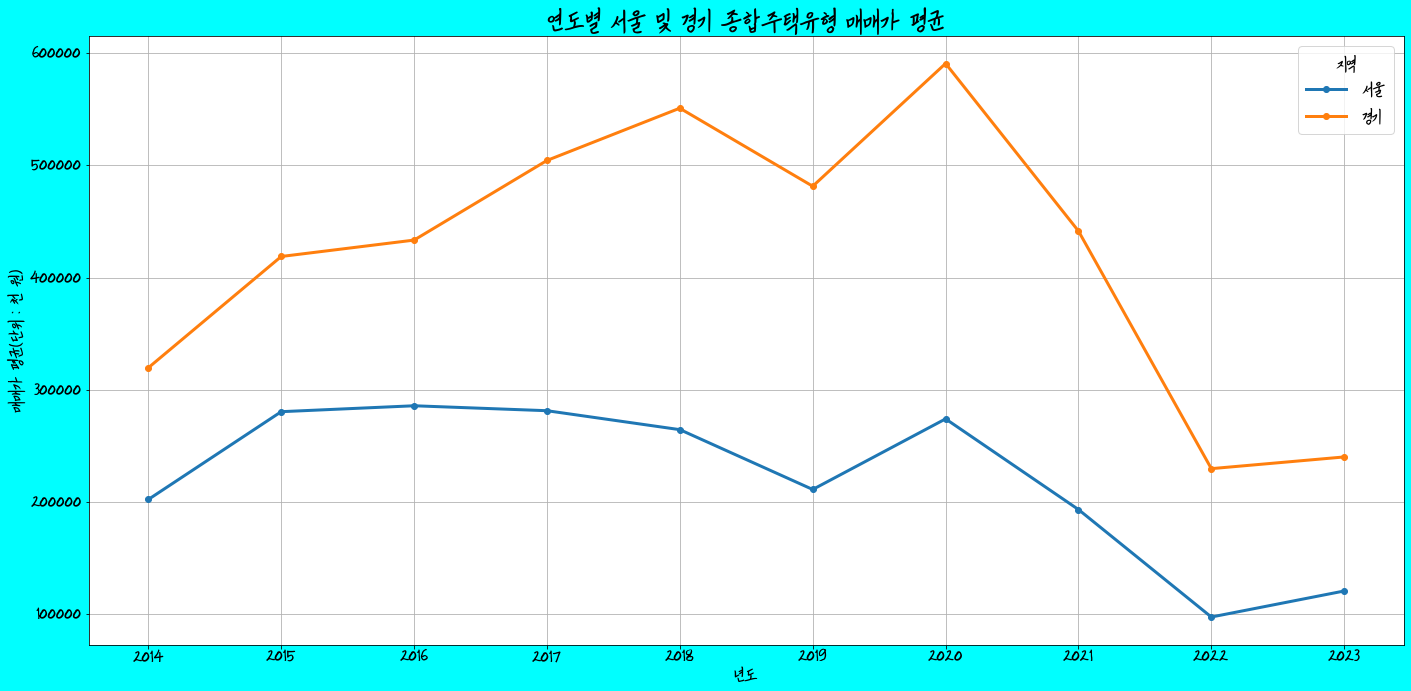

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 폰트 설정
font_path = '/Users/apple/공공데이터/Nanum HarABeoJiEuiNaNum.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name, size=20)

# 첫 번째 데이터: 서울 및 경기 주택 매매가 평균
df2 = pd.read_csv('변경된_주택거래.csv')
df_filtered = df2[['지역/년도/거래량(단위:동(호))', '서울', '경기']].copy()
df_filtered['년도'] = df_filtered['지역/년도/거래량(단위:동(호))'].str.extract('(\d{4})')[0]
df_filtered.set_index('년도', inplace=True)
df_filtered.index = df_filtered.index.astype(int)

# 두 번째 데이터: 한국은행 기준 금리
df5 = pd.read_csv('한국은행 기준금리 및 여수신금리_20170239.csv')
df_melted = df5.melt(id_vars=['통계표', '계정항목', '단위', '변환'], 
                     var_name='년도', 
                     value_name='금리')
df_filtered_kr = df_melted[df_melted['계정항목'] == '한국은행 기준금리'].copy()
df_filtered_kr['년도'] = pd.to_datetime(df_filtered_kr['년도'], format='%Y')

# 한국은행 기준 금리 그래프
plt.figure(figsize=(20, 10))

# 두 번째 그래프: 한국은행 기준 금리
plt.plot(df_filtered_kr['년도'], df_filtered_kr['금리'], marker='o', linestyle='-', color='b', linewidth=3)
plt.title('한국은행 기준 금리 변화', fontsize=30, fontweight='bold')
plt.xlabel('년도', fontsize=20, fontweight='bold')
plt.ylabel('금리 (%)', fontsize=20, fontweight='bold')
plt.grid(True)
plt.tick_params(axis='x', rotation=45, labelsize=20)
plt.tight_layout()
plt.show()

# 서울 및 경기 종합주택유형 매매가 평균 그래프
plt.figure(figsize=(20, 10), facecolor='cyan')

# x축을 년도로 설정
years = df_filtered.index  # df_filtered.columns 대신 df_filtered.index 사용

# 서울과 경기 데이터만 추출
seoul_data = df_filtered['서울']
gyeonggi_data = df_filtered['경기']

# 서울과 경기의 선 그래프 그리기
plt.plot(years, seoul_data, marker='o', label='서울', linewidth=3)
plt.plot(years, gyeonggi_data, marker='o', label='경기', linewidth=3)

# 범례 및 그래프 설정
plt.legend(fontsize=20, title='지역')
plt.title('연도별 서울 및 경기 종합주택유형 매매가 평균', fontsize=30, fontweight='bold')
plt.ylabel('매매가 평균(단위 : 천 원)', fontsize=20, fontweight='bold')
plt.xlabel('년도', fontsize=20, fontweight='bold')
plt.xticks(years, fontsize=20)  # 모든 연도(1년 단위)로 눈금 설정
plt.yticks(fontsize=20)

# 그래프 출력
plt.grid(True)  # 그리드 추가
plt.tight_layout()  # 레이아웃 조정
plt.show()


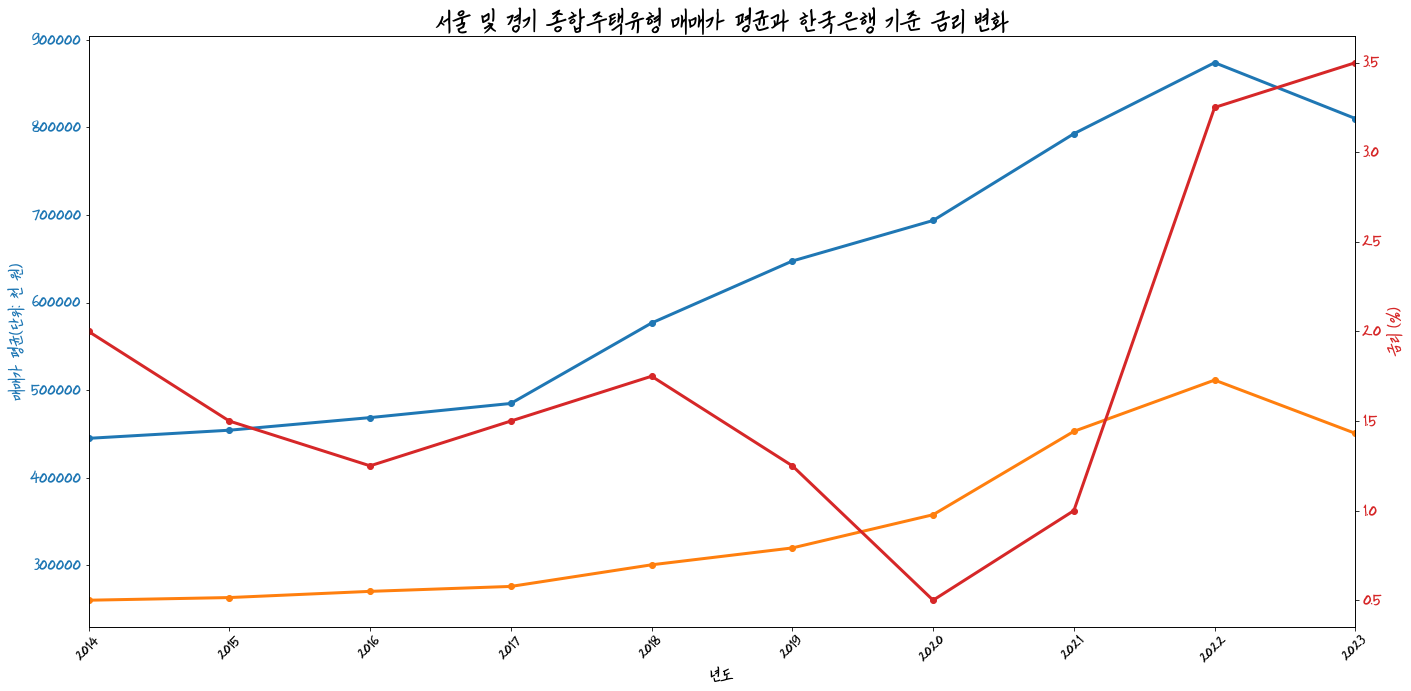

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 폰트 설정
font_path = '/Users/apple/공공데이터/Nanum HarABeoJiEuiNaNum.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name, size=20)

# 첫 번째 데이터: 서울 및 경기 주택 매매가 평균
df1 = pd.read_excel('평균매매가격_종합.xlsx')
df2 = df1.iloc[9:]
df3 = df2.rename(columns = df2.iloc[0])  # 열 이름 변경
df4 = df3.iloc[1:]
df5 = df4.reset_index()  # index 재설정
df6 = df5.iloc[:, 1:]
df7 = df6[df6['지 역'].notna()]  # NaN값 제외
df8 = df7.reset_index()
df9 = df8.iloc[:, 1:]
df10 = df9.drop(df9.columns[1:27], axis=1)  # 불필요한 열 제외
df11 = df10.T  # 행/열 변경
df12 = df11.rename(columns=df11.iloc[0])
df13 = df12.iloc[1:121]
idx_val = df13.index.values

# index 값 통합
for i in range(len(idx_val)):
    if i < 12:
        idx_val[i] = '2014'
    elif i < 24:
        idx_val[i] = '2015'
    elif i < 36:
        idx_val[i] = '2016'
    elif i < 48:
        idx_val[i] = '2017'
    elif i < 60:
        idx_val[i] = '2018'
    elif i < 72:
        idx_val[i] = '2019'
    elif i < 84:
        idx_val[i] = '2020'
    elif i < 96:
        idx_val[i] = '2021'
    elif i < 108:
        idx_val[i] = '2022'
    elif i < 120:
        idx_val[i] = '2023'

df13.index = idx_val
df13.index.name = '연도별 종합주택유형 매매가 평균(단위 : 천원)'
df14 = df13.groupby('연도별 종합주택유형 매매가 평균(단위 : 천원)').mean()  # 연도별 평균 계산
df14.loc[:, '전국':'제주'] = df14.loc[:, '전국':'제주'].astype(int)  # data type 변경(float -> int32)
df15 = df14.drop(df14.columns[1:7], axis=1)
df16 = df15.T

# x축 인덱스를 숫자로 변환
df16.columns = df16.columns.astype(int)

# 두 번째 데이터: 한국은행 기준 금리
df5 = pd.read_csv('한국은행 기준금리 및 여수신금리_20170239.csv')
df_melted = df5.melt(id_vars=['통계표', '계정항목', '단위', '변환'], 
                     var_name='년도', 
                     value_name='금리')
df_filtered_kr = df_melted[df_melted['계정항목'] == '한국은행 기준금리'].copy()
df_filtered_kr['년도'] = pd.to_datetime(df_filtered_kr['년도'], format='%Y')
df_filtered_kr.set_index('년도', inplace=True)
df_filtered_kr.index = df_filtered_kr.index.year

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(20, 10))

# 서울 및 경기 종합주택유형 매매가 평균 그래프
color = 'tab:blue'
ax1.set_xlabel('년도', fontsize=20, fontweight='bold')
ax1.set_ylabel('매매가 평균(단위: 천 원)', fontsize=20, fontweight='bold', color=color)
ax1.plot(df16.columns, df16.loc['서울'], marker='o', label='서울', color='tab:blue', linewidth=3)
ax1.plot(df16.columns, df16.loc['경기'], marker='o', label='경기', color='tab:orange', linewidth=3)
ax1.tick_params(axis='y', labelcolor=color)

# x축 레이블 조정
ax1.set_xticks(df16.columns)
ax1.set_xticklabels(df16.columns, rotation=45, fontsize=18)

# 한국은행 기준 금리 그래프
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('금리 (%)', fontsize=20, fontweight='bold', color=color)
ax2.plot(df_filtered_kr.index, df_filtered_kr['금리'], marker='o', linestyle='-', color=color, linewidth=3)
ax2.tick_params(axis='y', labelcolor=color)

# 두 축의 x축 범위 맞추기
ax1.set_xlim(df16.columns.min(), df16.columns.max())
ax2.set_xlim(df16.columns.min(), df16.columns.max())

# 그래프 제목 및 레이아웃 조정
plt.title('서울 및 경기 종합주택유형 매매가 평균과 한국은행 기준 금리 변화', fontsize=30, fontweight='bold')
plt.tight_layout()

# 그래프를 파일로 저장
plt.savefig('/Users/apple/공공데이터/project_2jo/graph_output.png', format='png', bbox_inches='tight')  # 파일 경로와 형식 설정

# 그래프 표시
plt.show()


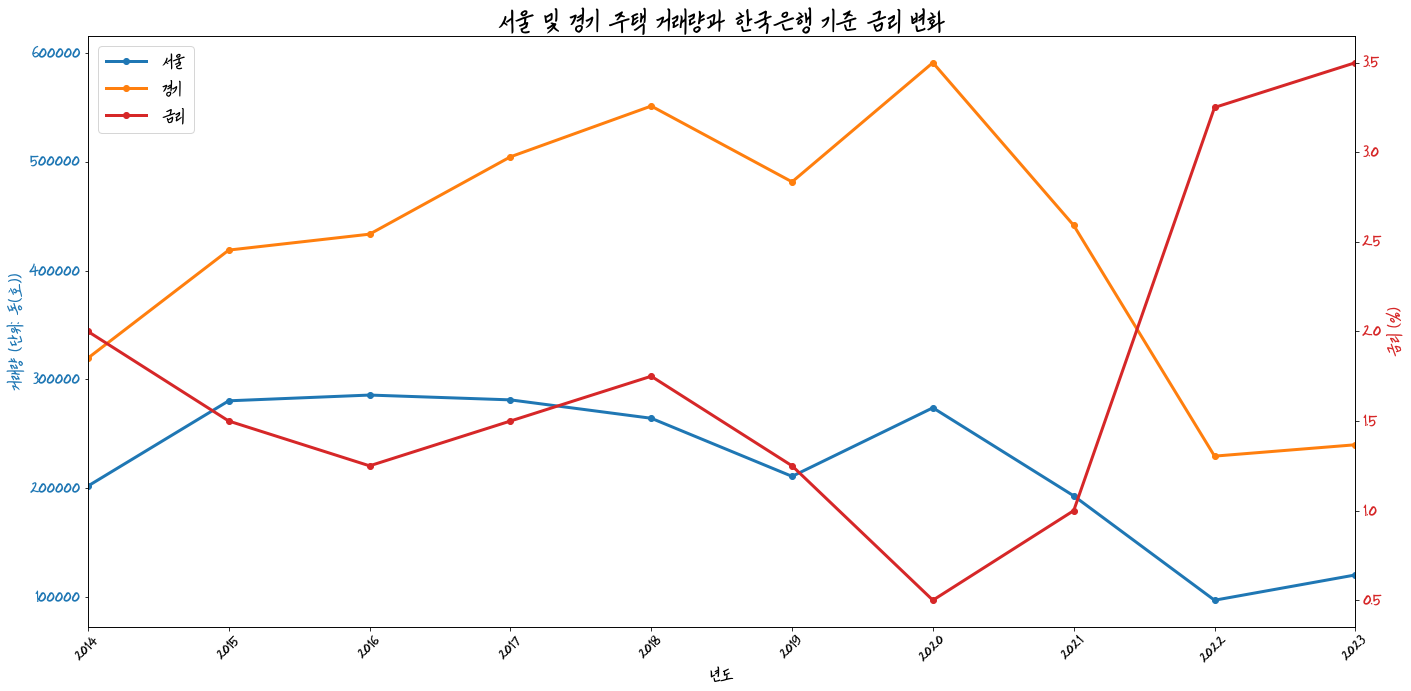

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 폰트 설정
font_path = '/Users/apple/공공데이터/Nanum HarABeoJiEuiNaNum.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name, size=20)

# 첫 번째 데이터: 서울 및 경기 주택 거래량
df2 = pd.read_csv('변경된_주택거래.csv')
df_filtered = df2[['지역/년도/거래량(단위:동(호))', '서울', '경기']].copy()
df_filtered['년도'] = df_filtered['지역/년도/거래량(단위:동(호))'].str.extract('(\d{4})')[0]
df_filtered.set_index('년도', inplace=True)
df_filtered.index = df_filtered.index.astype(int)

# 두 번째 데이터: 한국은행 기준 금리
df5 = pd.read_csv('한국은행 기준금리 및 여수신금리_20170239.csv')
df_melted = df5.melt(id_vars=['통계표', '계정항목', '단위', '변환'], 
                     var_name='년도', 
                     value_name='금리')
df_filtered_kr = df_melted[df_melted['계정항목'] == '한국은행 기준금리'].copy()
df_filtered_kr['년도'] = pd.to_datetime(df_filtered_kr['년도'], format='%Y')
df_filtered_kr.set_index('년도', inplace=True)
df_filtered_kr.index = df_filtered_kr.index.year

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(20, 10))

# 서울 및 경기 주택 거래량 그래프
color = 'tab:blue'
ax1.set_xlabel('년도', fontsize=20, fontweight='bold')
ax1.set_ylabel('거래량 (단위: 동(호))', fontsize=20, fontweight='bold', color=color)
line1 = ax1.plot(df_filtered.index, df_filtered['서울'], marker='o', 
                 label='서울', color='tab:blue', linewidth=3)
line2 = ax1.plot(df_filtered.index, df_filtered['경기'], marker='o', 
                 label='경기', color='tab:orange', linewidth=3)
ax1.tick_params(axis='y', labelcolor=color)

# x축 레이블 조정
ax1.set_xticks(df_filtered.index)
ax1.set_xticklabels(df_filtered.index, rotation=45, fontsize=18)

# 한국은행 기준 금리 그래프
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('금리 (%)', fontsize=20, fontweight='bold', color=color)
line3 = ax2.plot(df_filtered_kr.index, df_filtered_kr['금리'], marker='o', 
                 label='금리', linestyle='-', color=color, linewidth=3)
ax2.tick_params(axis='y', labelcolor=color)

# 두 축의 x축 범위 맞추기
ax1.set_xlim(df_filtered.index.min(), df_filtered.index.max())
ax2.set_xlim(df_filtered.index.min(), df_filtered.index.max())

# 그래프 제목 및 레이아웃 조정
plt.title('서울 및 경기 주택 거래량과 한국은행 기준 금리 변화', fontsize=30, fontweight='bold')
plt.tight_layout()

# 레전드 위치 조정
lines = line1 + line2 + line3
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

# 그래프를 파일로 저장
plt.savefig('/Users/apple/공공데이터/project_2jo/graph_output.png', format='png', bbox_inches='tight')

# 그래프 표시
plt.show()
